# Self Orginizing Map

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
import cv2

In [2]:
def color_cluster_line(data,nlist,size):
    figure(figsize=(12, 12))
    colors=[]
    for i in range(size):
        r=random.uniform(0, 1)
        g=random.uniform(0, 1)
        b=random.uniform(0, 1)
        colors.append((r,g,b))
    for index,row in data.iterrows():
        small_dist=np.inf
        for n in range(len(nlist)):
            dist=np.sqrt((row[0]-nlist[n][0])**2+(row[1]-nlist[n][1])**2)
            if dist<small_dist:
                small_dist=dist
                spot=n 
        plt.plot(row[0],row[1],'.',color=colors[spot])
    X=[]
    Y=[]
    for i in range(len(nlist)):
        X.append(nlist[i][0])
        Y.append(nlist[i][1])
        plt.annotate(i,(nlist[i][0],nlist[i][1]))        
    plt.plot(X,Y)
    plt.plot(X,Y,'*r')    
    plt.show()

In [3]:
def check_new(new):
    if new[0]>1:
        new[0]=1
    if new[0]<0:
        new[0]=0
    if new[1]>1:
        new[1]=1
    if new[1]<0:
        new[1]=0
    return new
        

In [4]:
def print_graph(nlist,slist):
    figure(figsize=(12, 12))
    X=[]
    Y=[]

    for i in range(len(nlist)):
        X.append(nlist[i][0])
        Y.append(nlist[i][1])
        plt.annotate(i,(nlist[i][0],nlist[i][1]))
        plt.plot(nlist[i][0],nlist[i][1],'*r')
    
    Xp=[]
    Yp=[]
    for n in slist:
        Xp.append(n[0])
        Yp.append(n[1])
    plt.plot(Xp,Yp,'.')
    plt.plot(X,Y)
    plt.show()

In [5]:
def make_nlist():
    nueron_lst=[]

    i=0
    while i<100:
        randX = random.uniform(0, 1)
        randY = random.uniform(0, 1)
#         print(randX, randY)
        if 0.4<=randX<=0.6:
            if 0.4<=randY<=0.6:
                nueron_lst.append(np.array([randX, randY])) 
                i+=1
    return nueron_lst


In [6]:
def make_dlist():
    nueron_lst=[]
#     xarr=np.arange(0,1,1/8)
#     yarr=np.arange(0,1,1/7)

#     for i in range(len(xarr)):
#         nueron_lst.append(np.array([xarr[i] ,1]))
#     for i in range(len(yarr)-1,-1,-1):
#         nueron_lst.append(np.array([1 ,yarr[i]]))
#     for i in range(len(xarr)-1,-1,-1):
#         nueron_lst.append(np.array([xarr[i] ,0]))
#     for i in range(len(yarr)):
#         nueron_lst.append(np.array([0 ,yarr[i]]))
#     return nueron_lst
    i=0
    while i<30:
        randX = random.uniform(0, 1)
        randY = random.uniform(0, 1)
#         print(randX, randY)
        if 0.4<=randX<=0.6:
            if 0.4<=randY<=0.6:
                nueron_lst.append(np.array([randX, randY])) 
                i+=1
    return nueron_lst


In [7]:
def SOM(data):
    nueron_lst=make_nlist()
    mid=25
    num=25
    alpha=0.9
    ker=cv2.getGaussianKernel(mid*2+1,-1)
    sampled_points=[]
    for i in range(100):
        if i==0:
            print_graph(nueron_lst,sampled_points)  
        print("iteration ",i )
        
#         print_graph(nueron_lst,sampled_points)
        if i>0 and i%3==0:
            num-=1
            if num<1:
                num=1
        if i>0 and i%25==0:
            alpha/=2
        sampled_points=[]
        data=data.sample(frac=1)
        for index, row in data.iterrows():
            sampled_points.append(np.array([row[0], row[1]]))
            small_dist=np.inf

            # find closest nueron
            for n in range(len(nueron_lst)):
                dist=np.sqrt((row[0]-nueron_lst[n][0])**2+(row[1]-nueron_lst[n][1])**2)
                if dist<small_dist:
                    small_dist=dist
                    spot=n
                    
            # update weights of nuerons
            new = nueron_lst[spot]+alpha*ker[mid]*(sampled_points[-1]-nueron_lst[spot])
            new=check_new(new)
            nueron_lst[spot]=new
            
           
            for j in range(1,num):
                if spot-j>=0:
                    new = nueron_lst[spot-j]+alpha*ker[mid-j]*(sampled_points[-1]-nueron_lst[spot-j])
                    new=check_new(new)
                    nueron_lst[spot-j]=new
                if spot+j<len(nueron_lst):
                    new = nueron_lst[spot+j]+alpha*ker[mid+j]*(sampled_points[-1]-nueron_lst[spot+j])
                    new=check_new(new)
                    nueron_lst[spot+j]=new
        if i%10==0:
            print("after iteration ",i )
            print_graph(nueron_lst,sampled_points)

    print("after last iteration " )
    print_graph(nueron_lst,sampled_points)
    color_cluster_line(data,nueron_lst,100)


In [8]:
data_reg=pd.DataFrame()
random.seed(1)
for i in range(2000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data_reg[i] = [randX, randY]
data_reg=data_reg.T

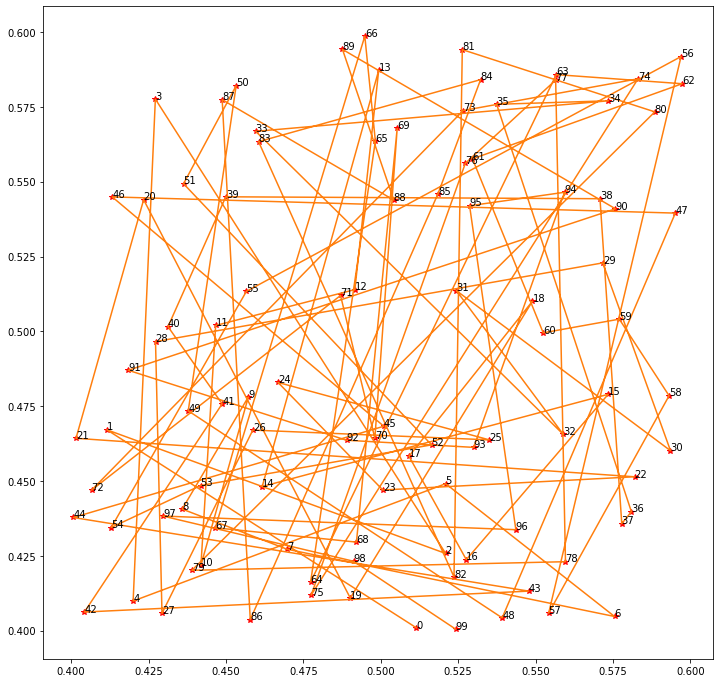

iteration  0
after iteration  0


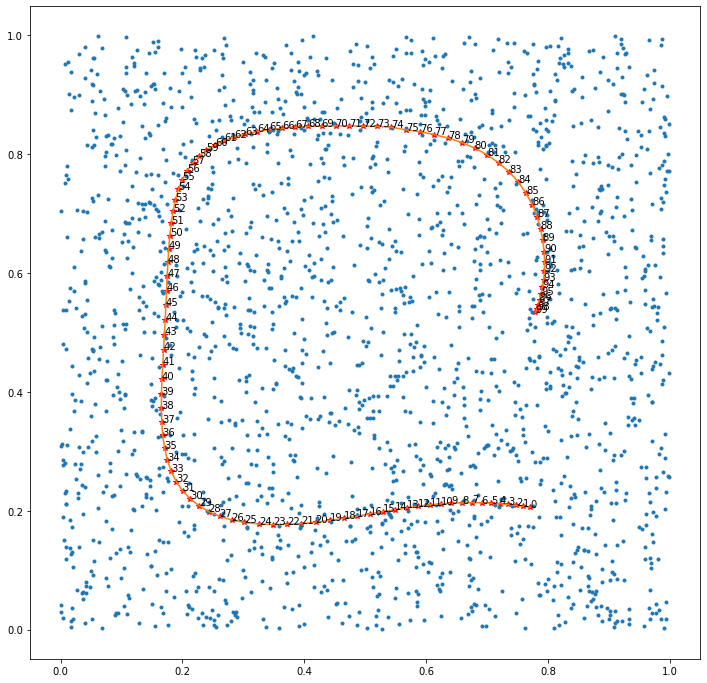

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
after iteration  10


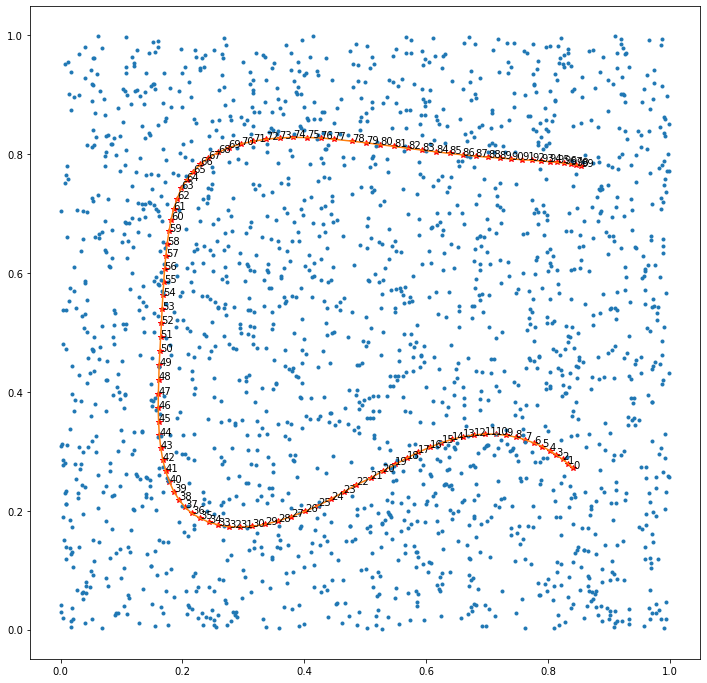

iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
after iteration  20


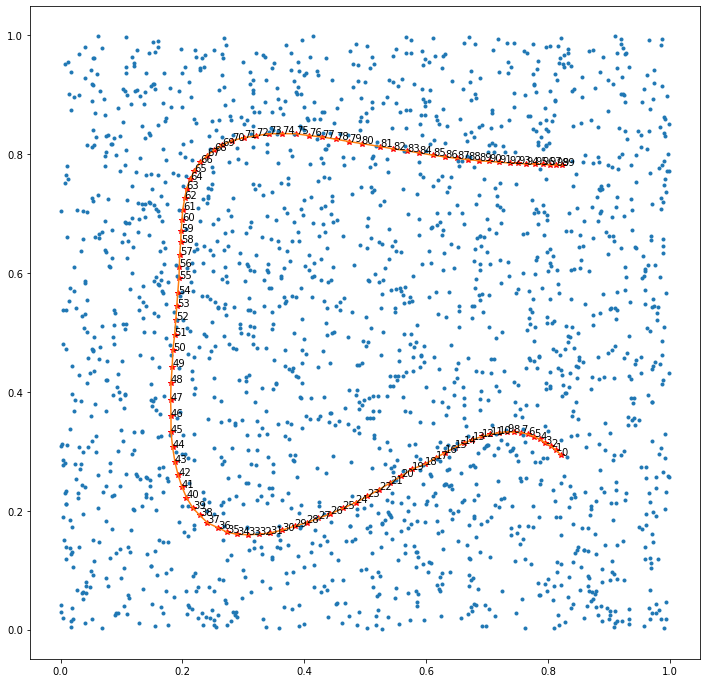

iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
after iteration  30


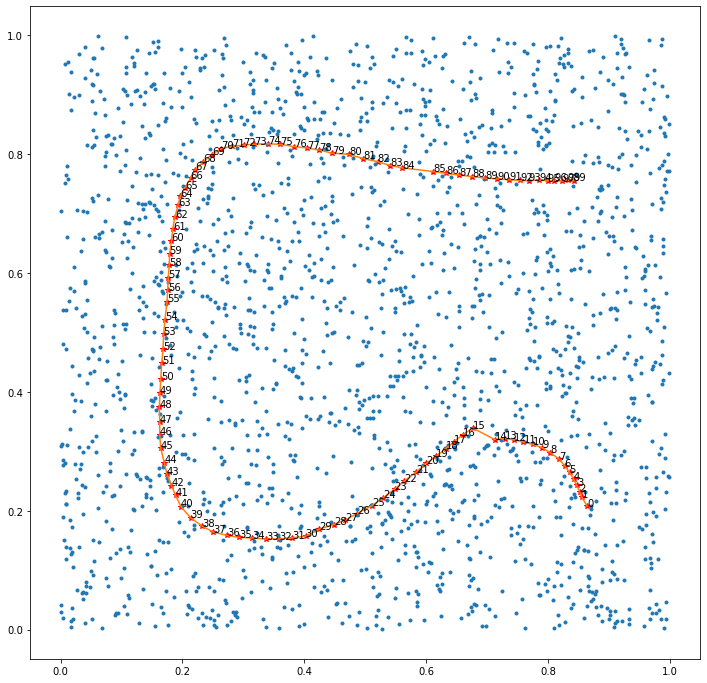

iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
after iteration  40


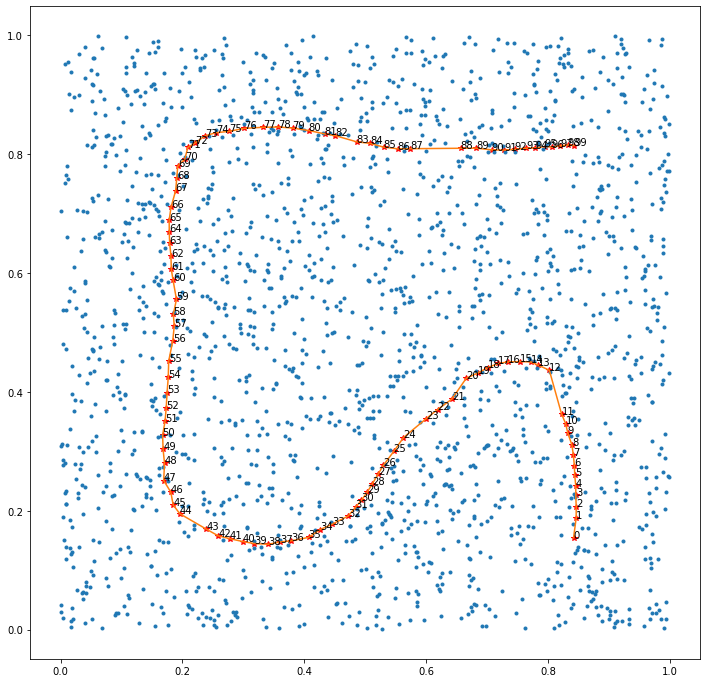

iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
after iteration  50


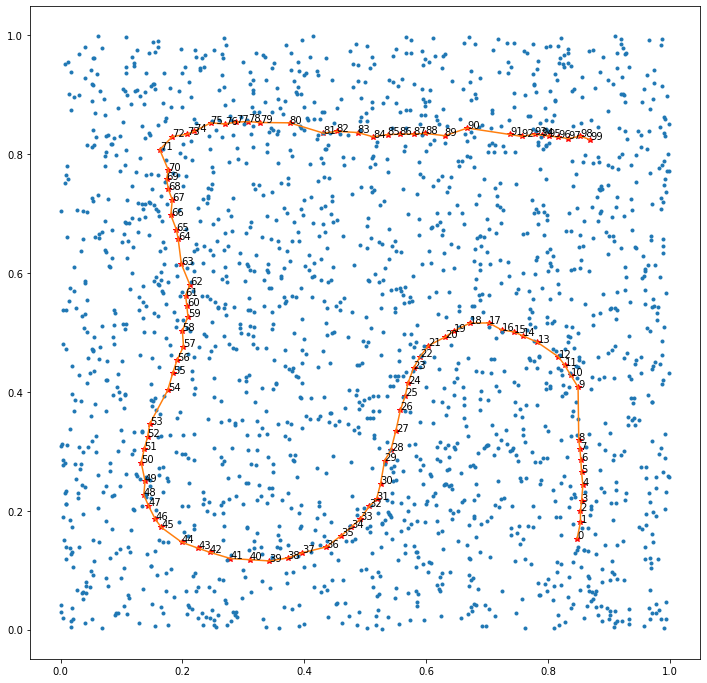

iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
after iteration  60


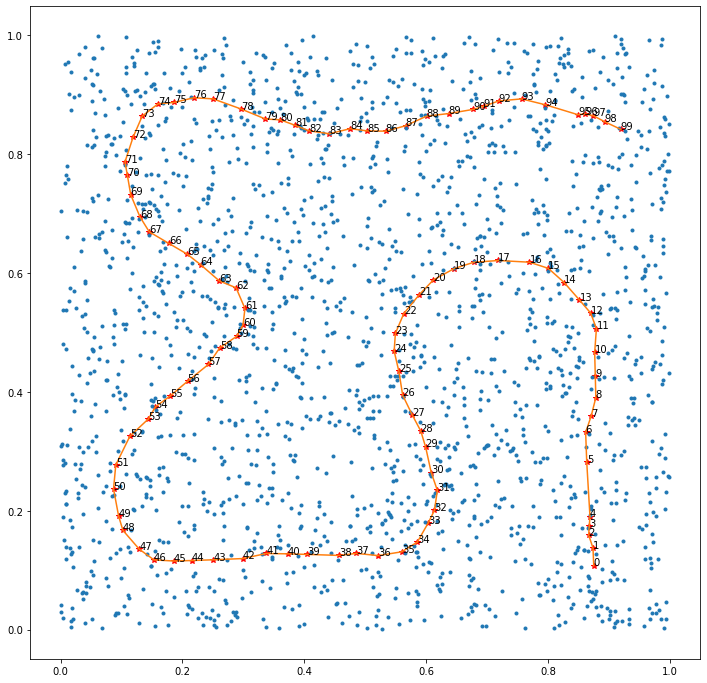

iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
iteration  66
iteration  67
iteration  68
iteration  69
iteration  70
after iteration  70


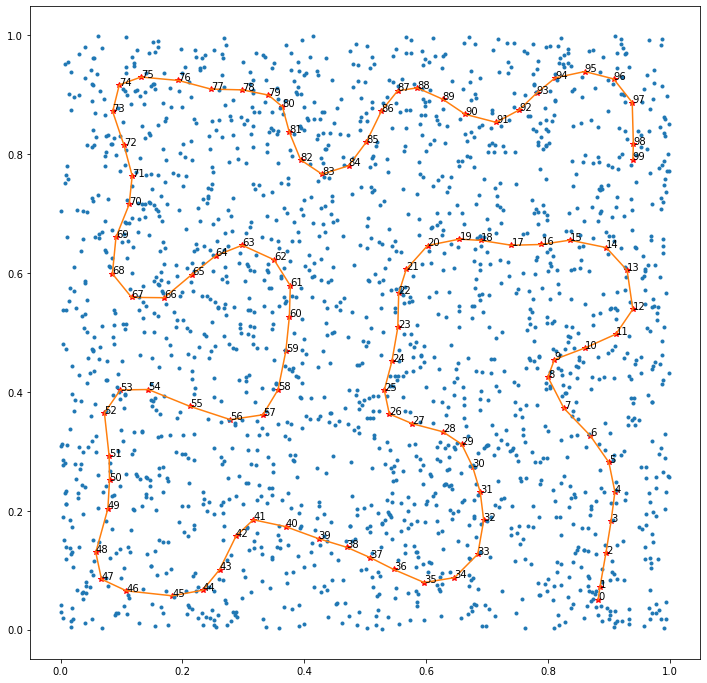

iteration  71
iteration  72
iteration  73
iteration  74
iteration  75
iteration  76
iteration  77
iteration  78
iteration  79
iteration  80
after iteration  80


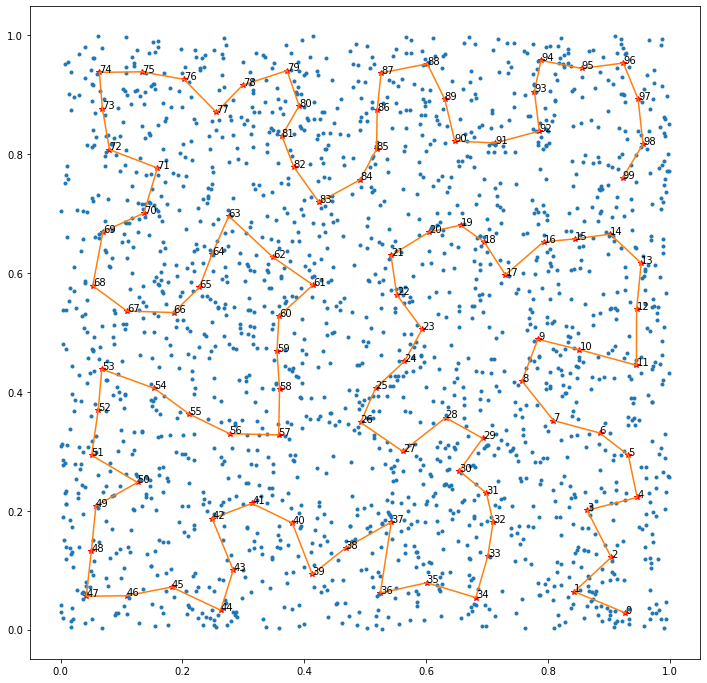

iteration  81
iteration  82
iteration  83
iteration  84
iteration  85
iteration  86
iteration  87
iteration  88
iteration  89
iteration  90
after iteration  90


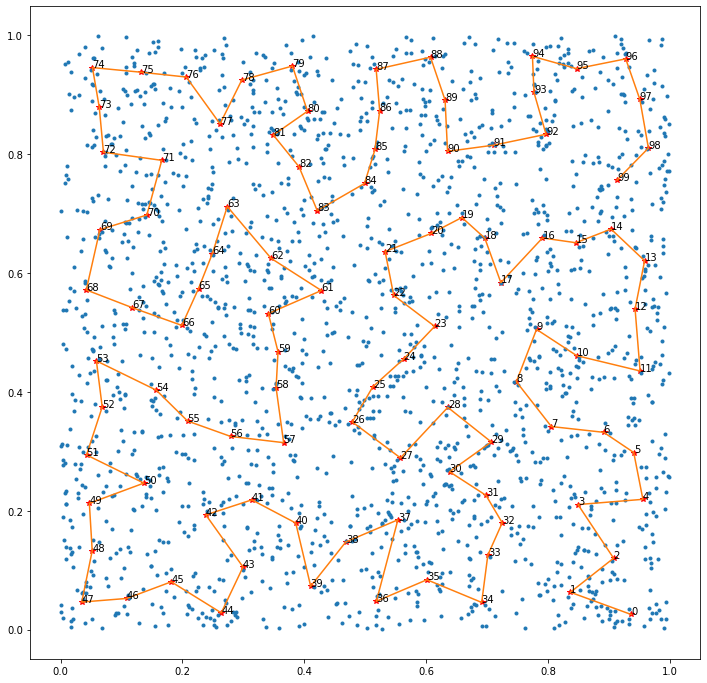

iteration  91
iteration  92
iteration  93
iteration  94
iteration  95
iteration  96
iteration  97
iteration  98
iteration  99
after last iteration 


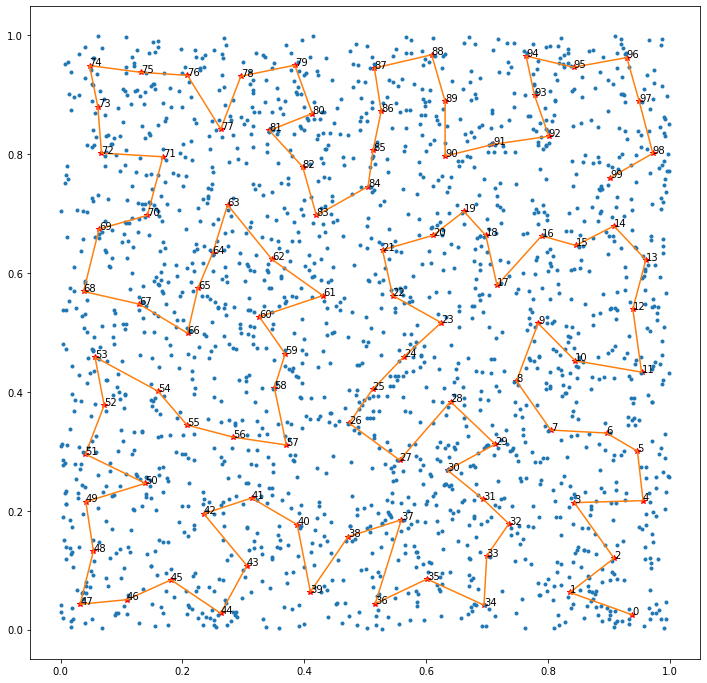

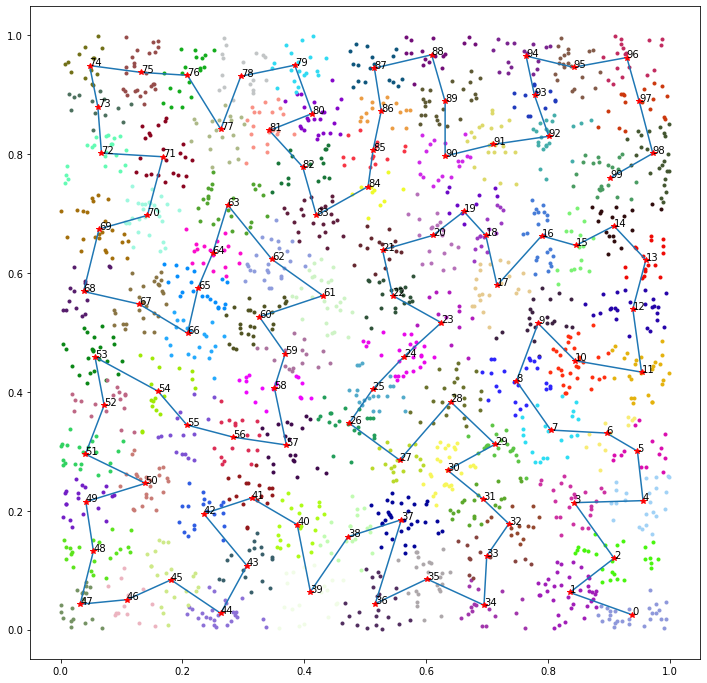

In [9]:
SOM(data_reg)

In [10]:
data_corner=pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randX<=0.5:
        randX=randX**2
    else:
        randX=randX**0.5
    if randY<=0.5:
        randY=randY**2
    else:
        randY=randY**0.5
    data_corner[i] = [randX, randY]
data_corner=data_corner.T


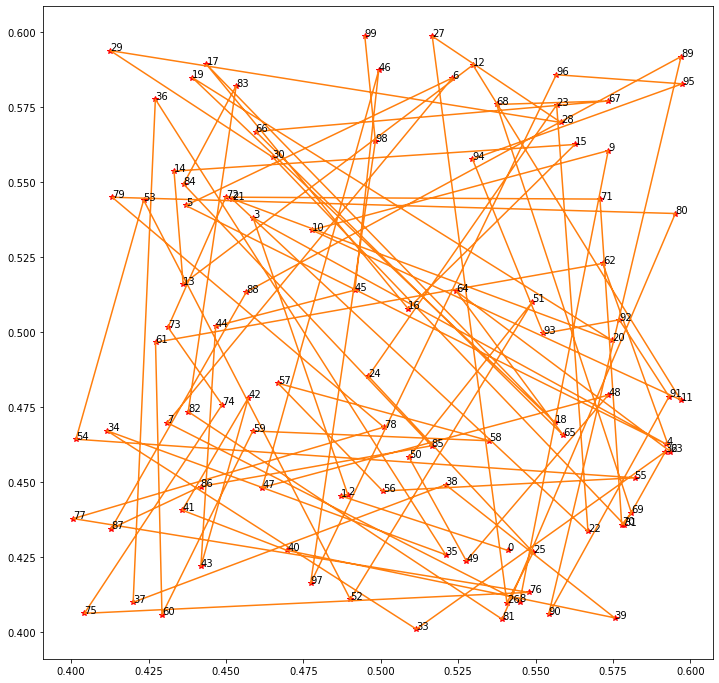

iteration  0
after iteration  0


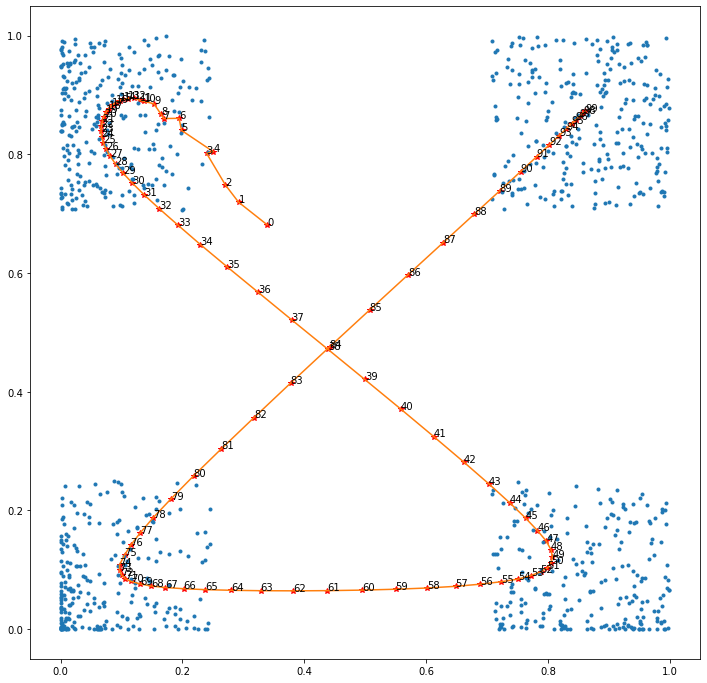

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
after iteration  10


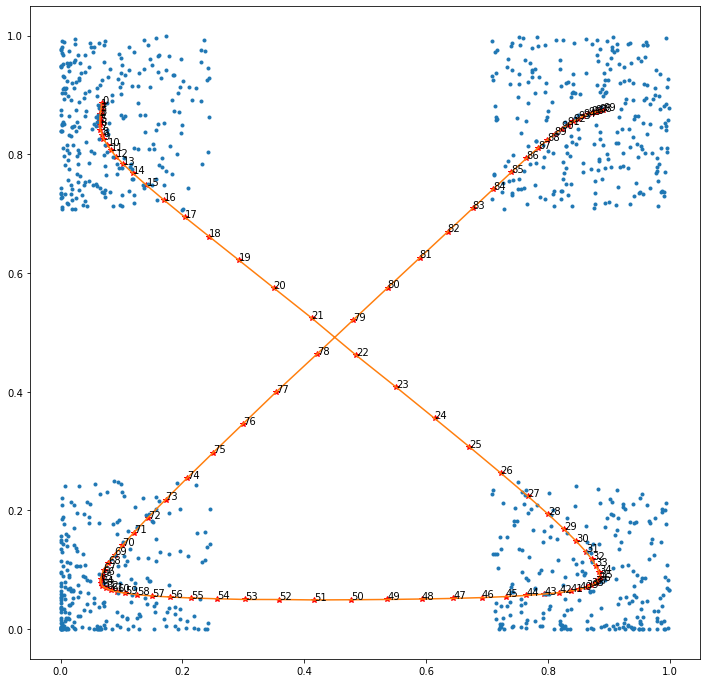

iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
after iteration  20


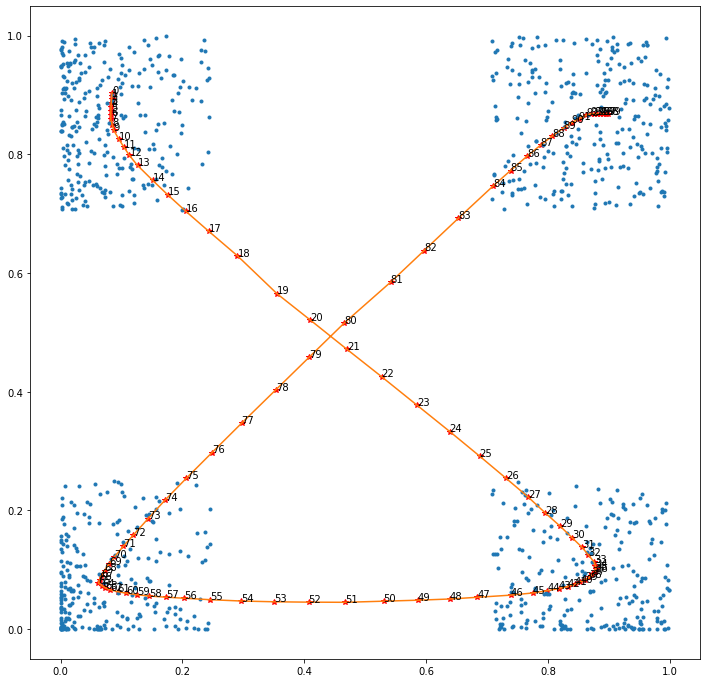

iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
after iteration  30


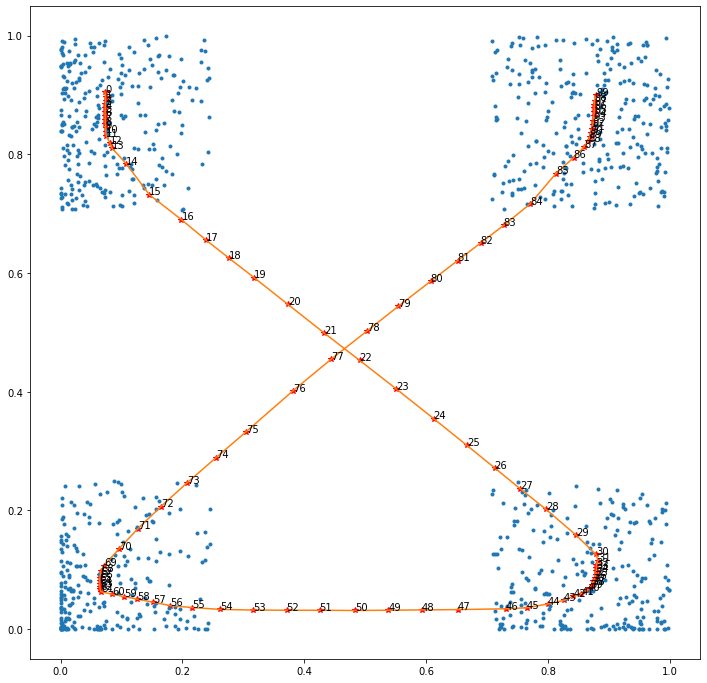

iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
after iteration  40


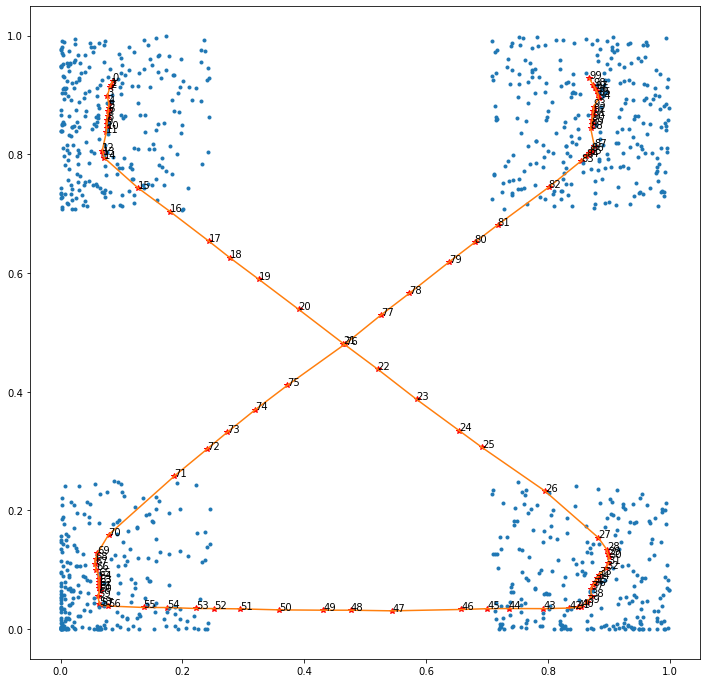

iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
after iteration  50


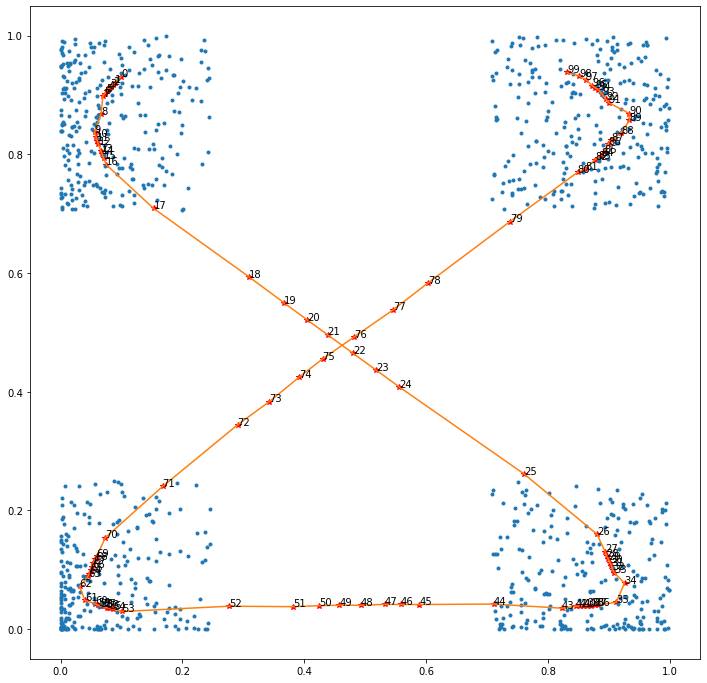

iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
after iteration  60


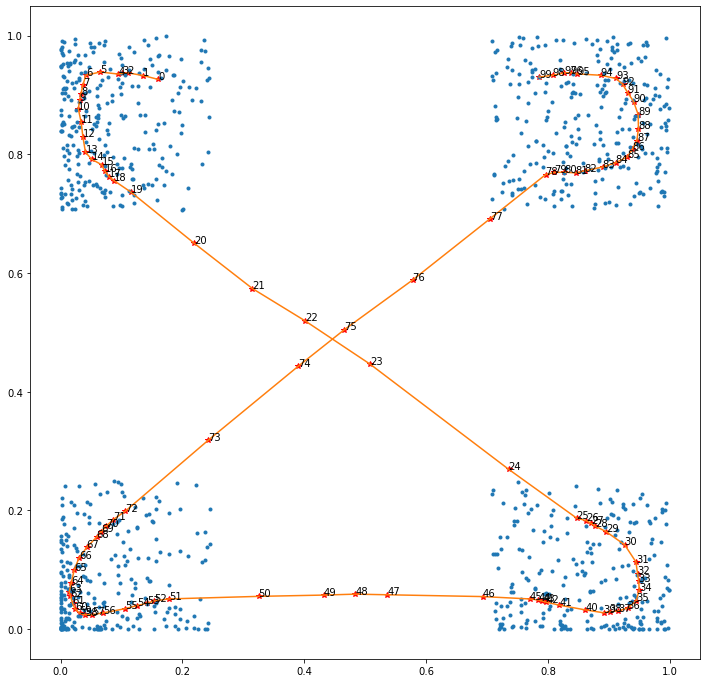

iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
iteration  66
iteration  67
iteration  68
iteration  69
iteration  70
after iteration  70


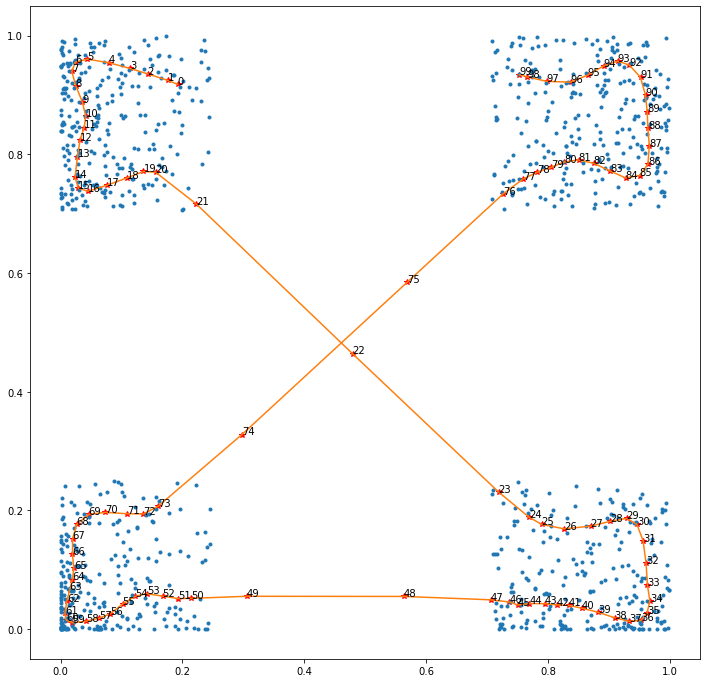

iteration  71
iteration  72
iteration  73
iteration  74
iteration  75
iteration  76
iteration  77
iteration  78
iteration  79
iteration  80
after iteration  80


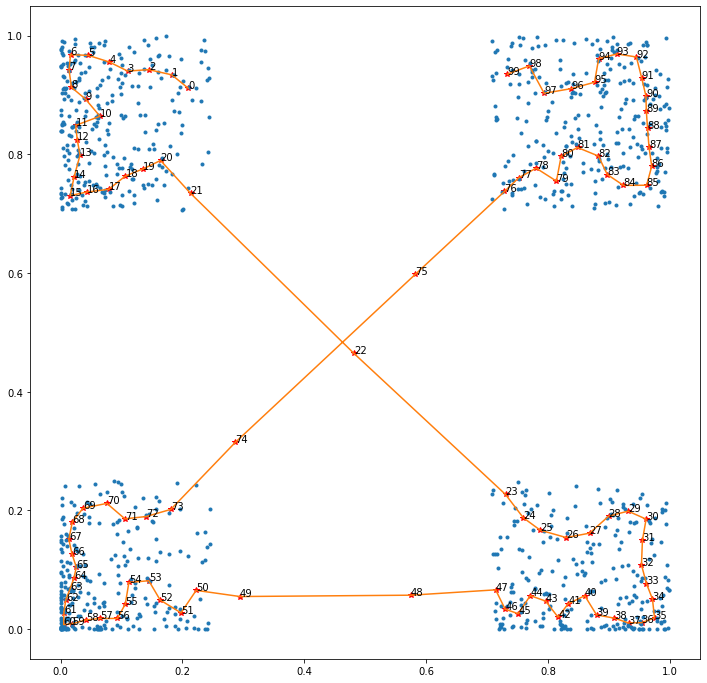

iteration  81
iteration  82
iteration  83
iteration  84
iteration  85
iteration  86
iteration  87
iteration  88
iteration  89
iteration  90
after iteration  90


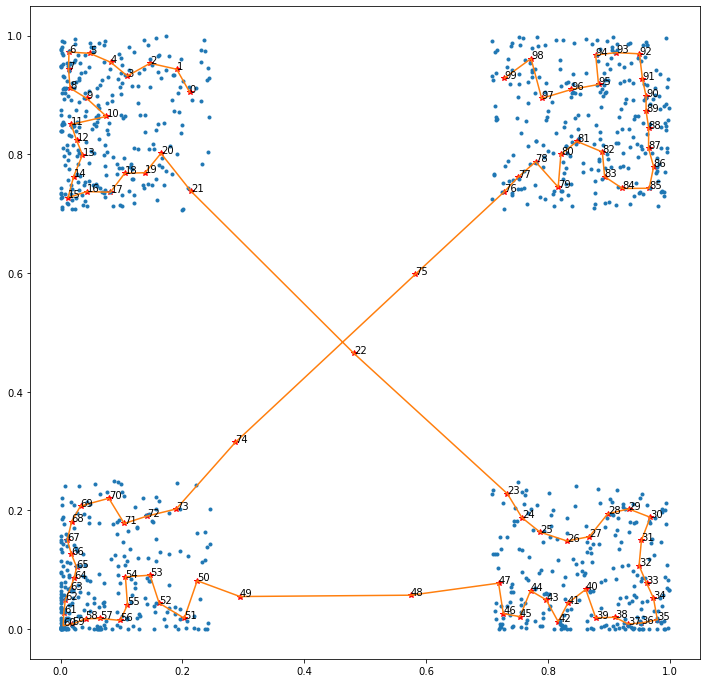

iteration  91
iteration  92
iteration  93
iteration  94
iteration  95
iteration  96
iteration  97
iteration  98
iteration  99
after last iteration 


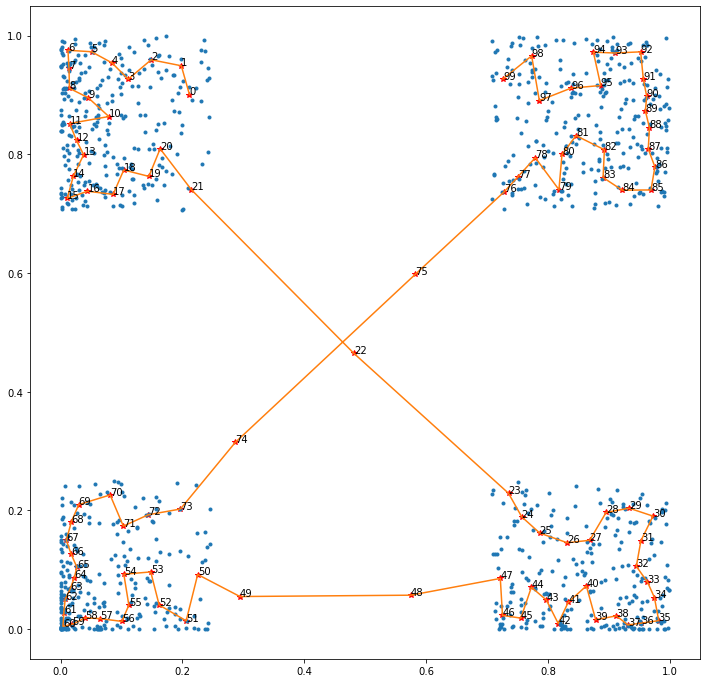

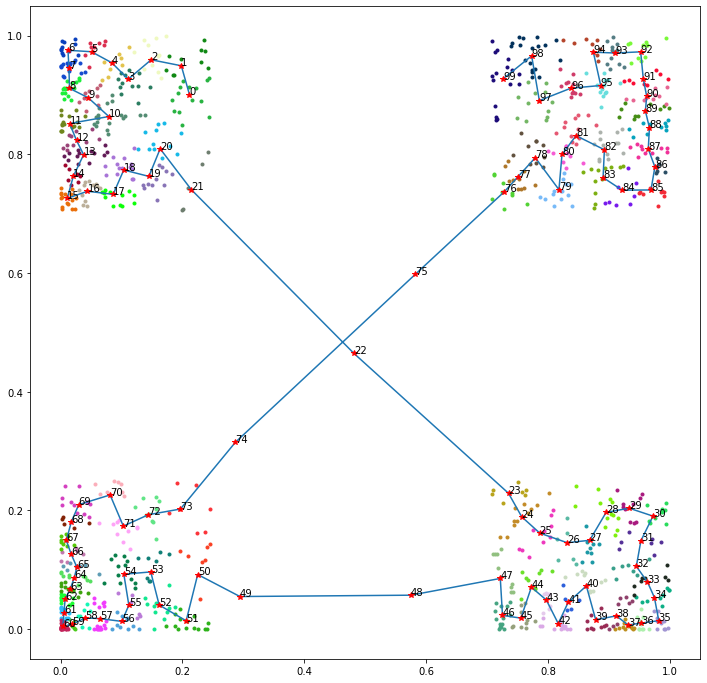

In [11]:
SOM(data_corner)

In [12]:
data_cubed=pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data_cubed[i] = [randX**3, randY**3]
data_cubed=data_cubed.T

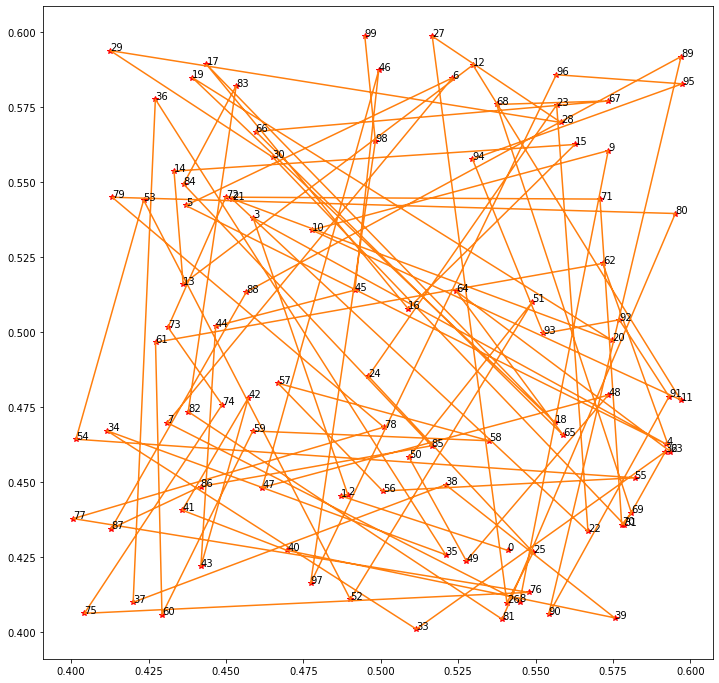

iteration  0
after iteration  0


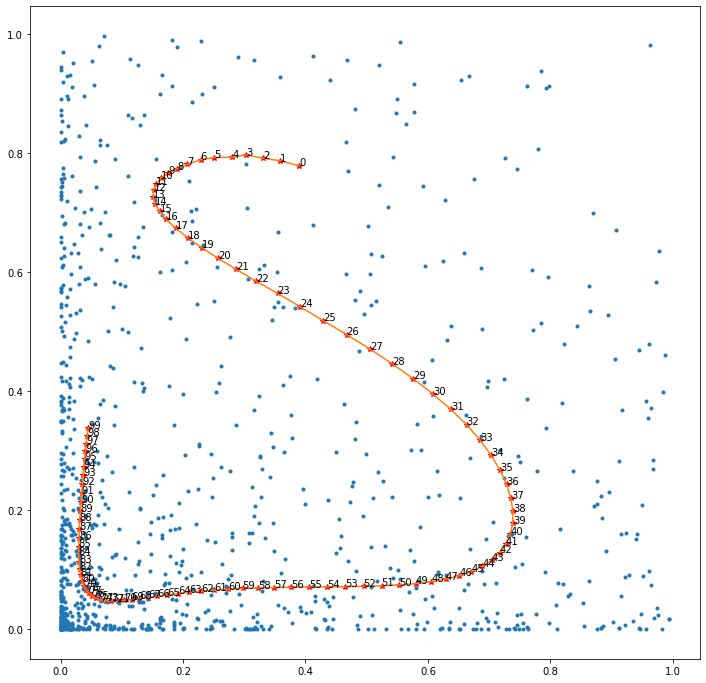

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
after iteration  10


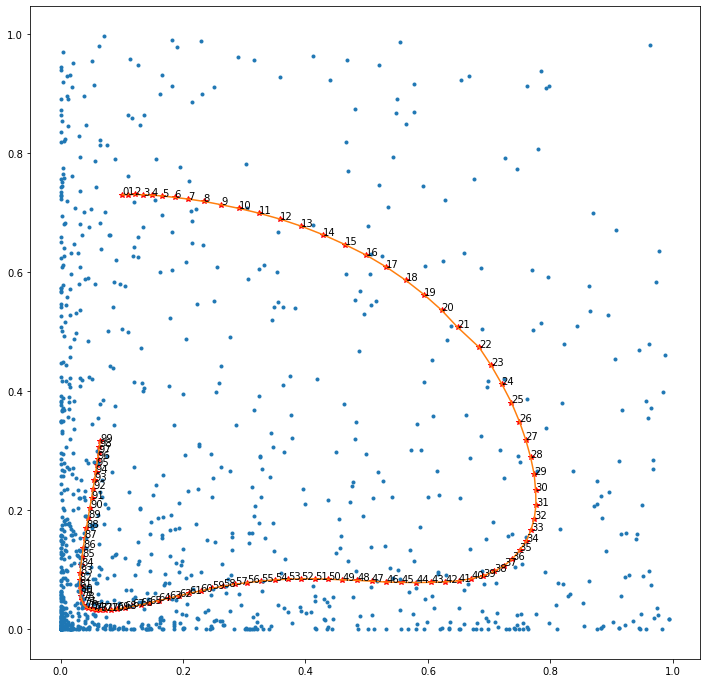

iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
after iteration  20


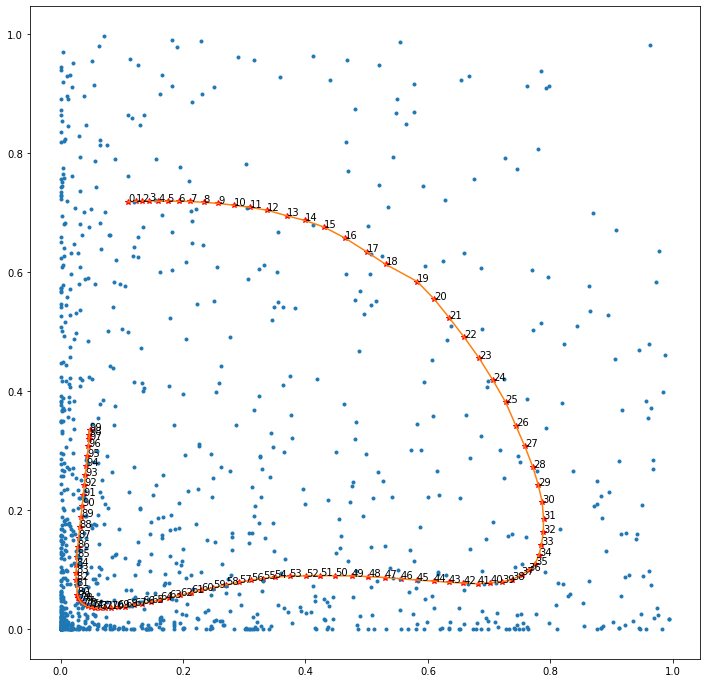

iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
after iteration  30


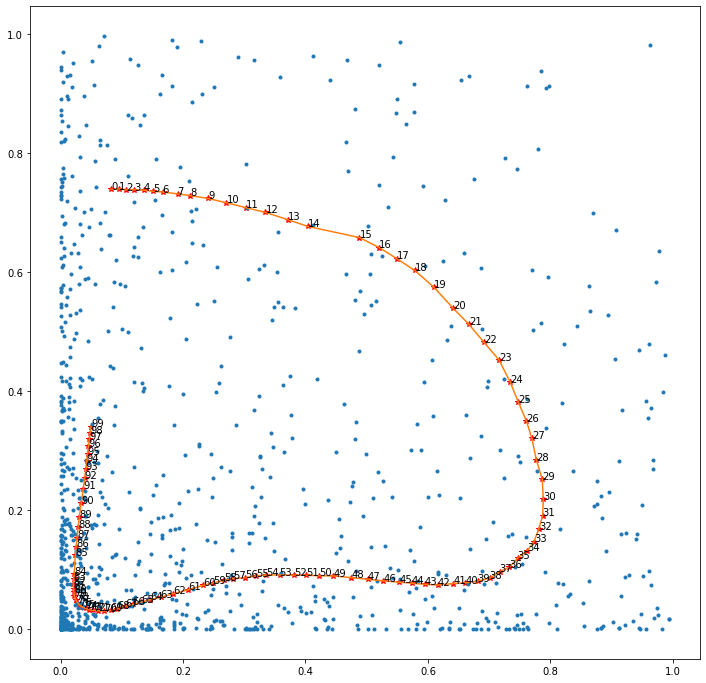

iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
after iteration  40


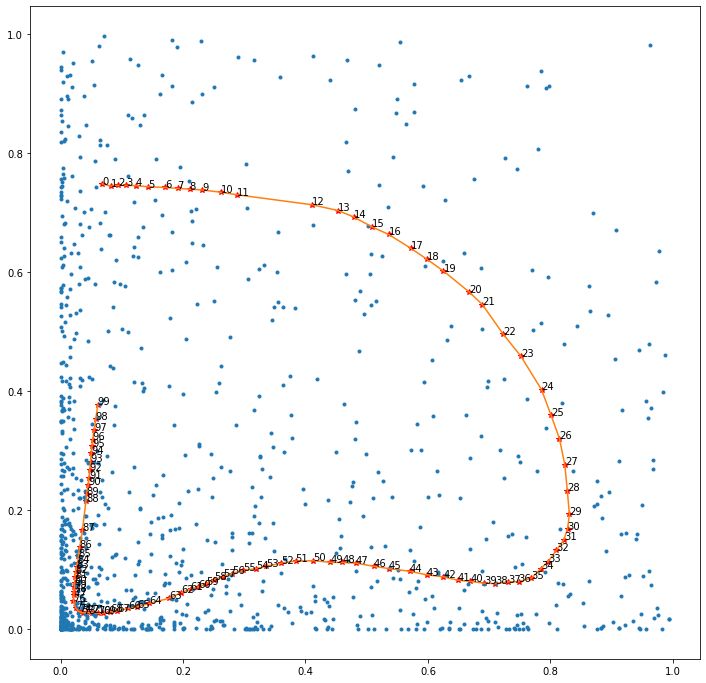

iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
after iteration  50


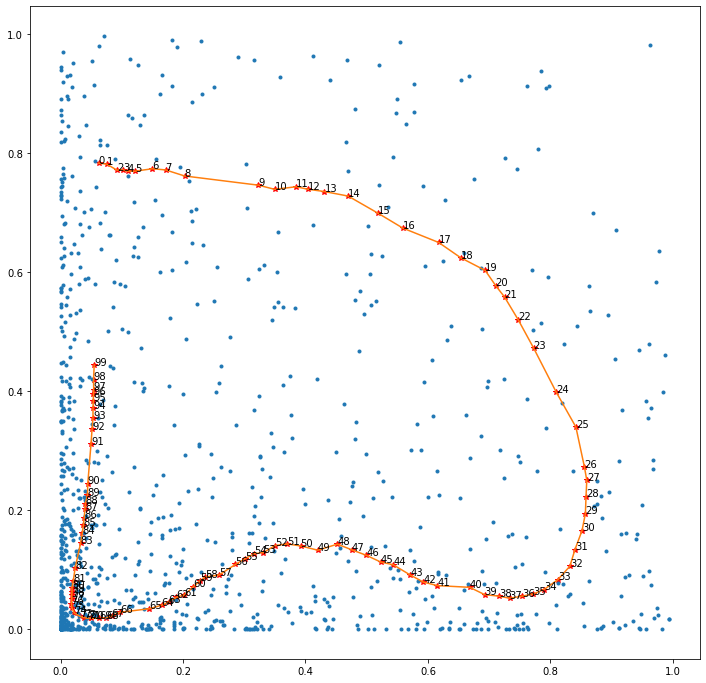

iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
after iteration  60


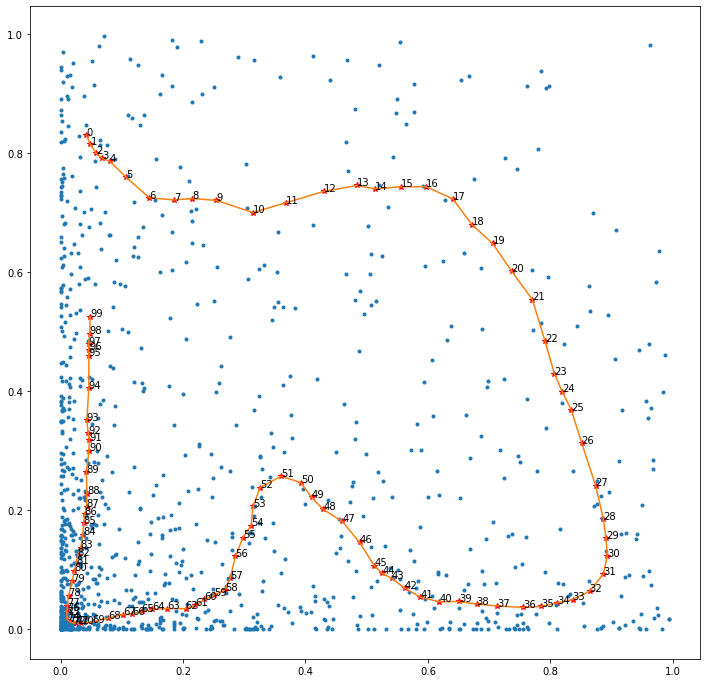

iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
iteration  66
iteration  67
iteration  68
iteration  69
iteration  70
after iteration  70


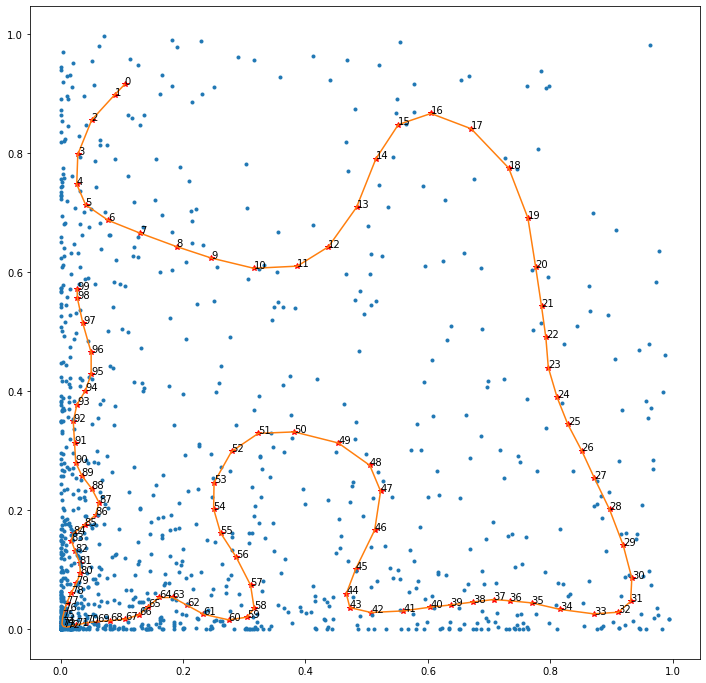

iteration  71
iteration  72
iteration  73
iteration  74
iteration  75
iteration  76
iteration  77
iteration  78
iteration  79
iteration  80
after iteration  80


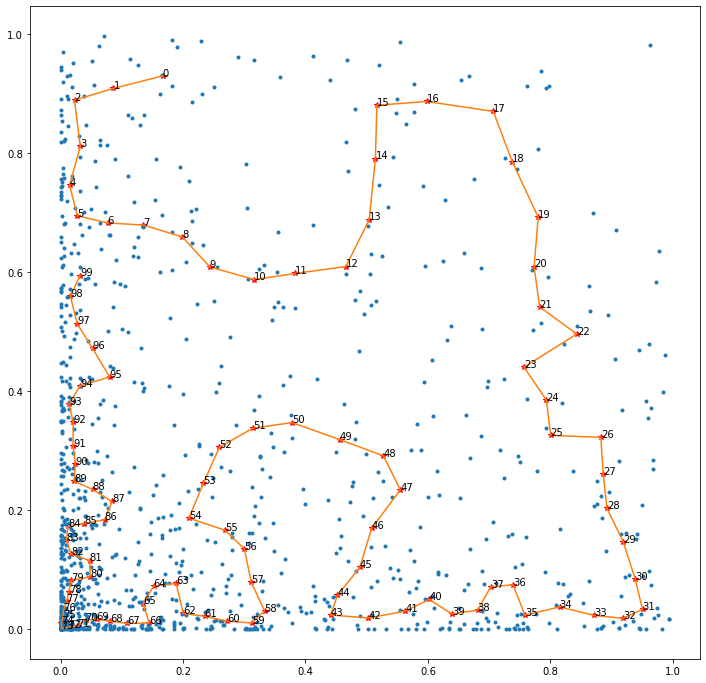

iteration  81
iteration  82
iteration  83
iteration  84
iteration  85
iteration  86
iteration  87
iteration  88
iteration  89
iteration  90
after iteration  90


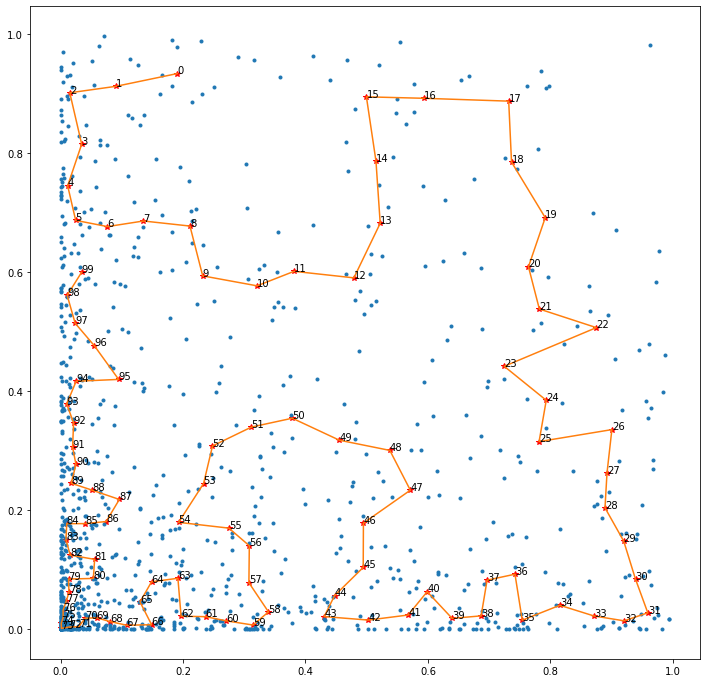

iteration  91
iteration  92
iteration  93
iteration  94
iteration  95
iteration  96
iteration  97
iteration  98
iteration  99
after last iteration 


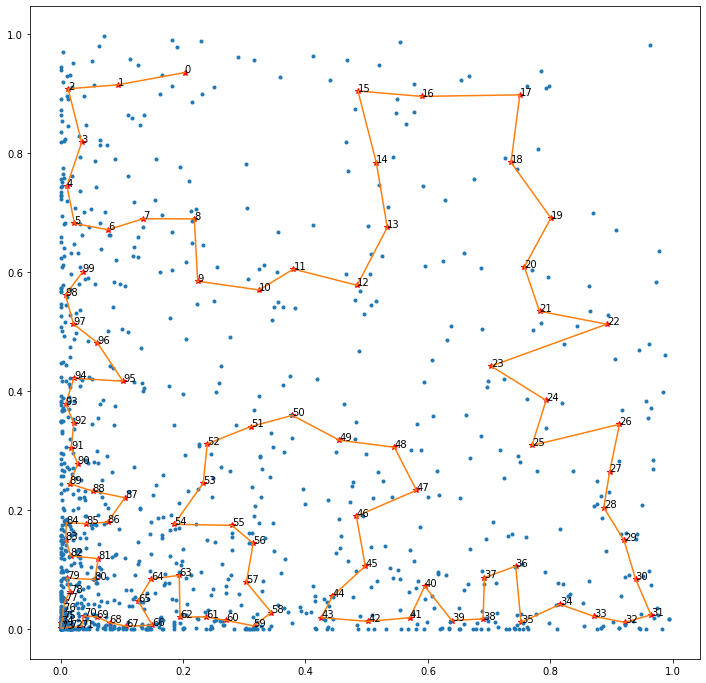

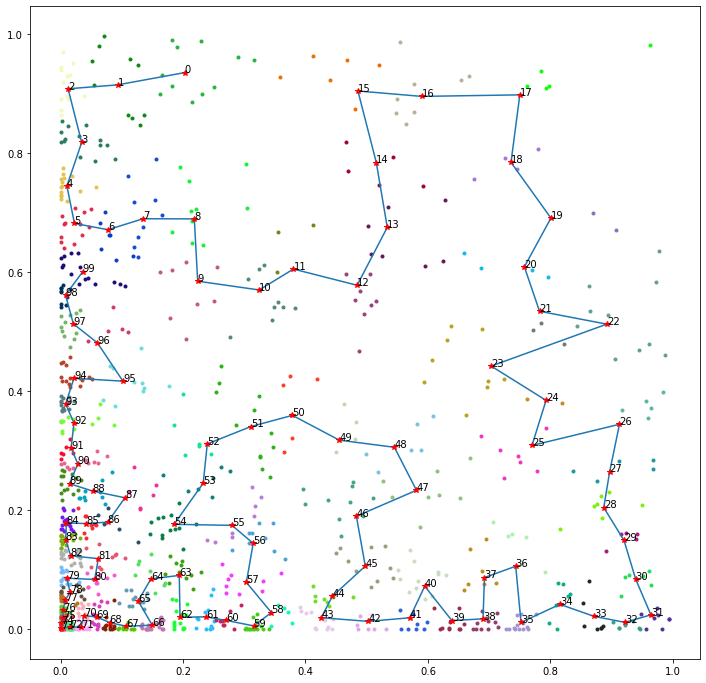

In [13]:
SOM(data_cubed)

In [14]:
def SOM_doughnut(data):
    nueron_lst=make_dlist()
    mid=15
    num=15
    alpha=1
    sampled_points=[]
    ker=cv2.getGaussianKernel(mid*2+1,-1)
    for i in range(100):
        if i==0:
            print_graph(nueron_lst,sampled_points)
        if i>0 and i%3==0:
            num-=1
        if i>0 and i%20==0:
            alpha/=2
        sampled_points=[]
        data=data.sample(frac=1)
        for index, row in data.iterrows():
            sampled_points.append(np.array([row[0], row[1]]))
            small_dist=np.inf

            # find closest nueron
            for n in range(len(nueron_lst)):
                dist=np.sqrt((row[0]-nueron_lst[n][0])**2+(row[1]-nueron_lst[n][1])**2)
                if dist<small_dist:
                    small_dist=dist
                    spot=n
                    
            # update weights of nuerons
            new = nueron_lst[spot]+alpha*ker[mid]*(sampled_points[-1]-nueron_lst[spot])
            nueron_lst[spot]=new
            
           
            for j in range(1,num):
                new = nueron_lst[(spot+j)%len(nueron_lst)]+alpha*ker[mid+j]*(sampled_points[-1]-nueron_lst[(spot+j)%len(nueron_lst)])
                nueron_lst[(spot+j)%len(nueron_lst)]=new
                new = nueron_lst[(spot-j)%len(nueron_lst)]+alpha*ker[mid-j]*(sampled_points[-1]-nueron_lst[(spot-j)%len(nueron_lst)])

                nueron_lst[(spot-j)%len(nueron_lst)]=new
        if i%10==0:
            print("after iteration ",i )
            print_graph(nueron_lst,sampled_points)
    print("iteration ",i )
    print_graph(nueron_lst,sampled_points)
    color_cluster_line(data,nueron_lst,30)
    


In [15]:
# make doughnut
doughnut=pd.DataFrame()
random.seed(1)
i=0
# for i in range(5000):
while i<2000:
#     print(i)
    randX = random.uniform(-4, 4)
    randY = random.uniform(-4, 4)
    if 2<=randX**2+randY**2<=4:
        doughnut[i] = [randX, randY]
        i+=1
doughnut=doughnut.T
# X=[]
# Y=[]
# for index,row in doughnut.iterrows():
#     X.append(row[0])
#     Y.append(row[1])
# figure(figsize=(12, 12))
# # plt.plot(X,Y)
# plt.plot(X,Y,"ro")
# plt.show()

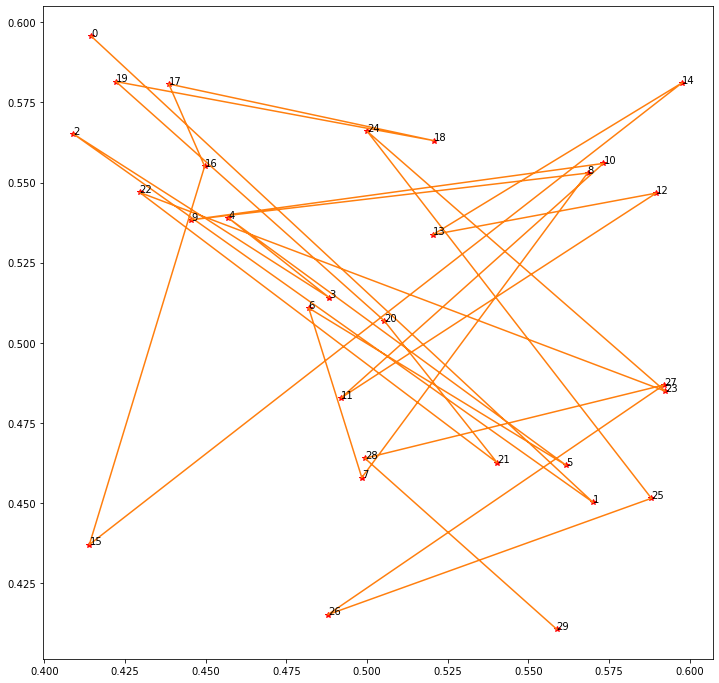

after iteration  0


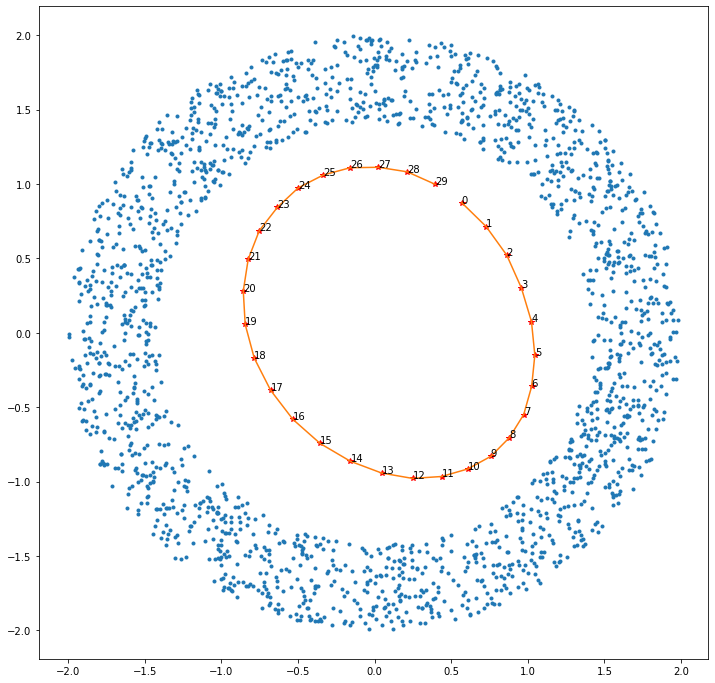

after iteration  10


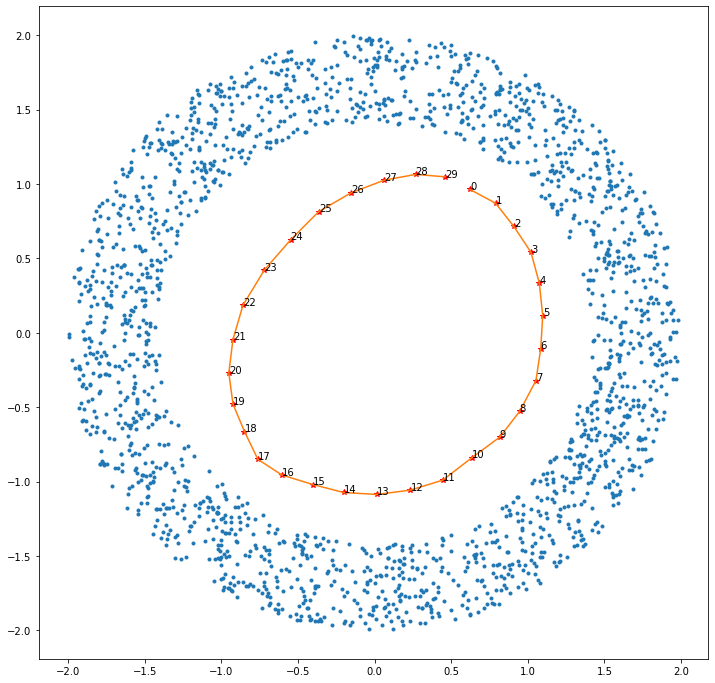

after iteration  20


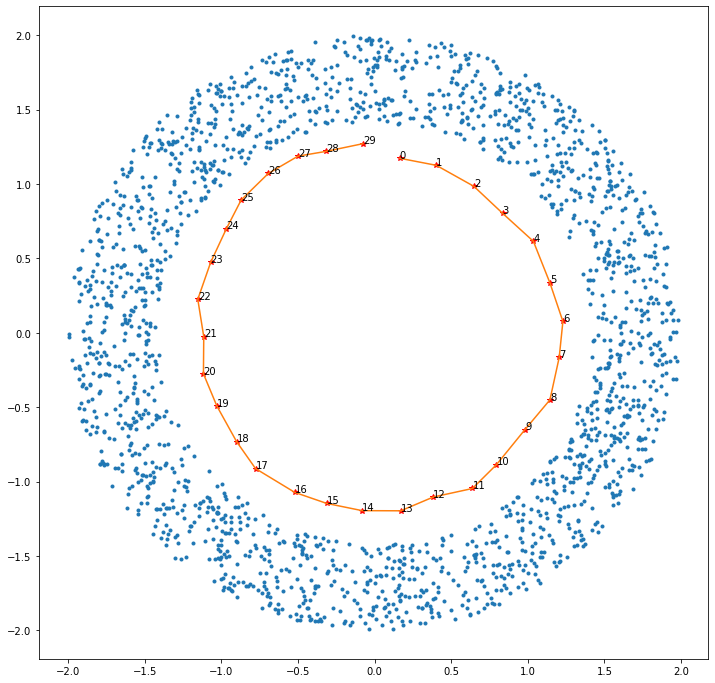

after iteration  30


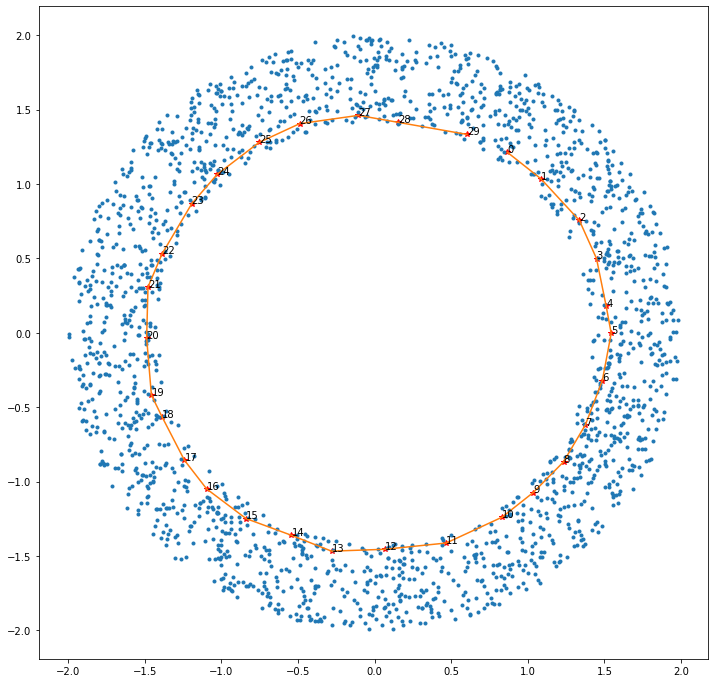

after iteration  40


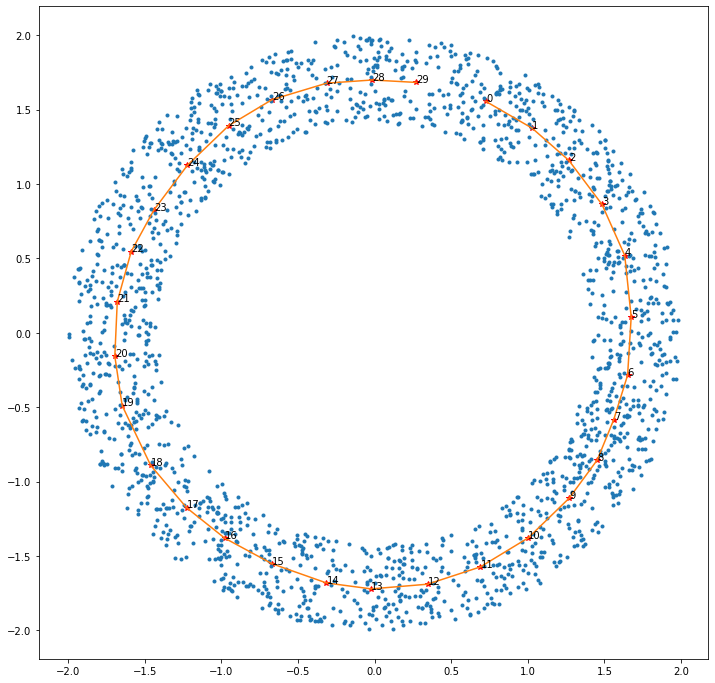

after iteration  50


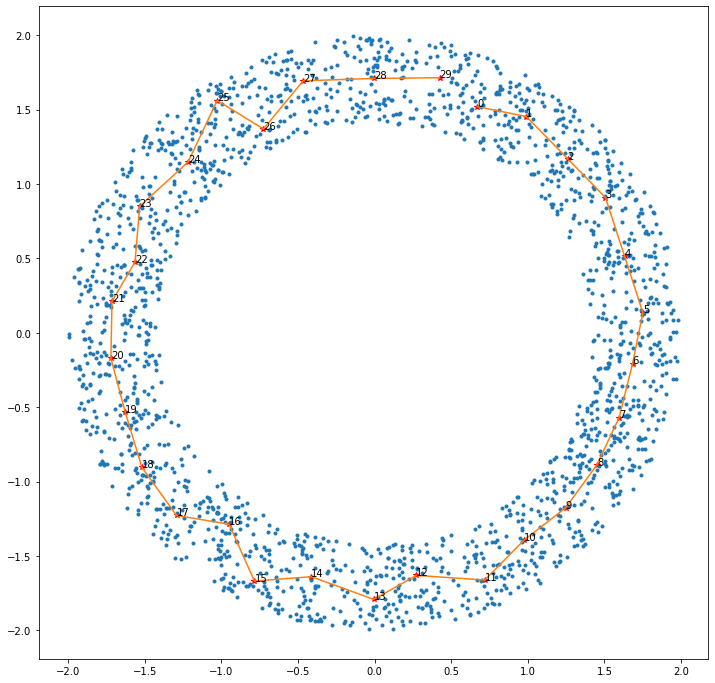

after iteration  60


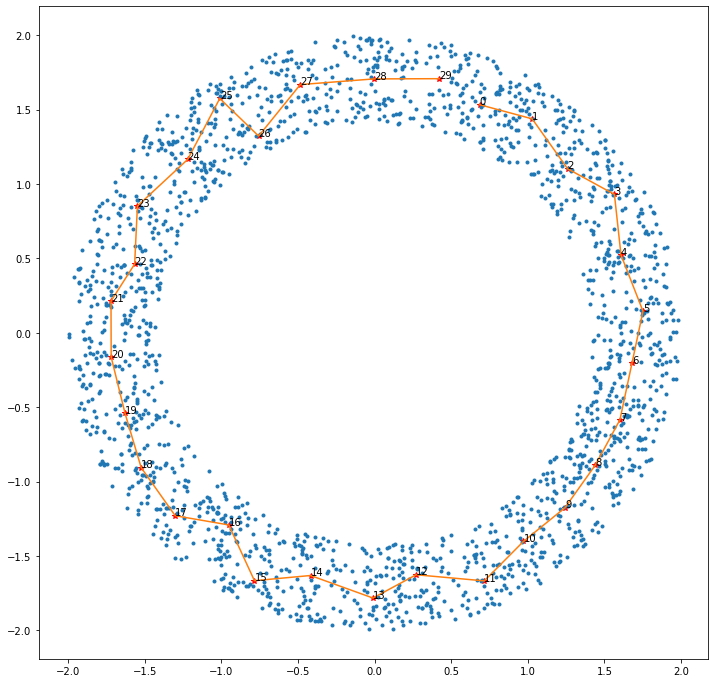

after iteration  70


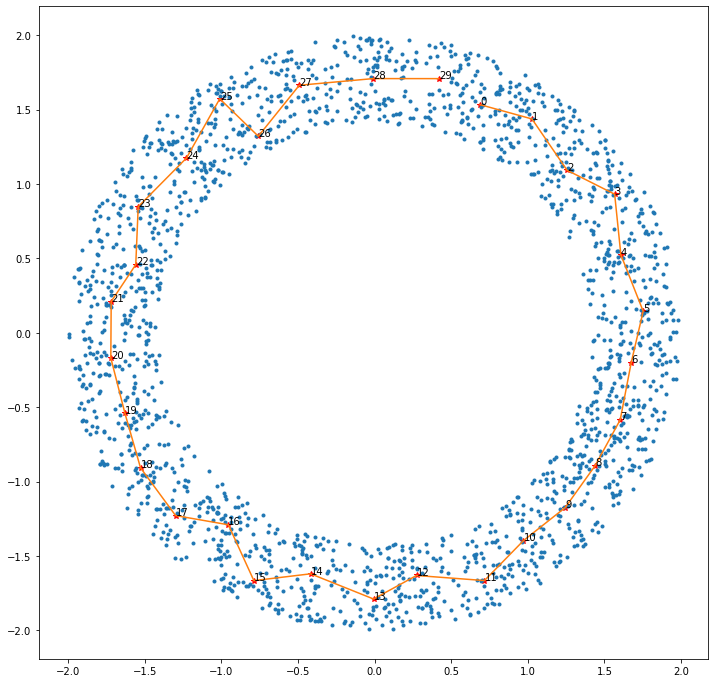

after iteration  80


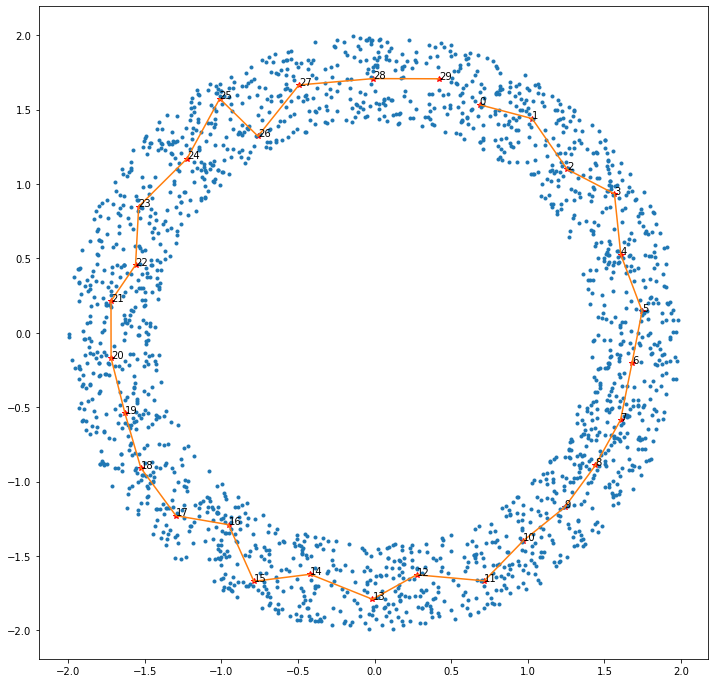

after iteration  90


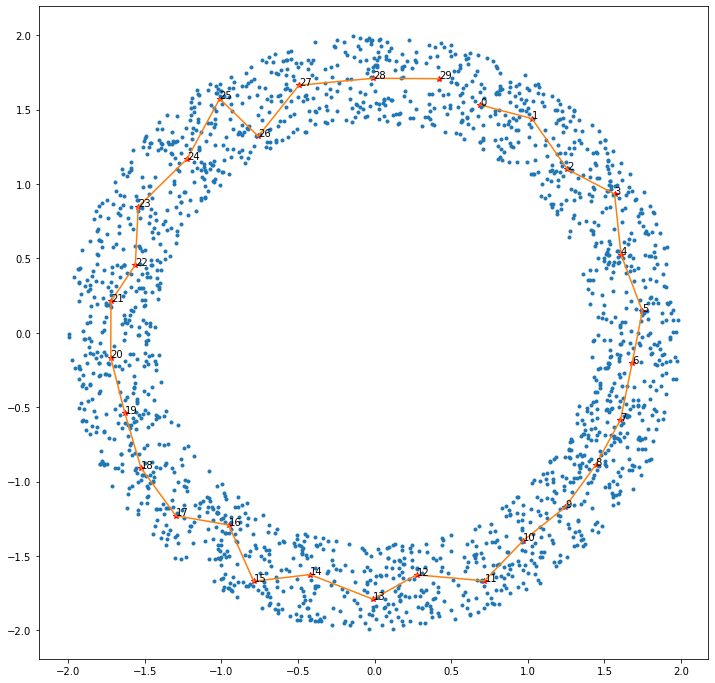

iteration  99


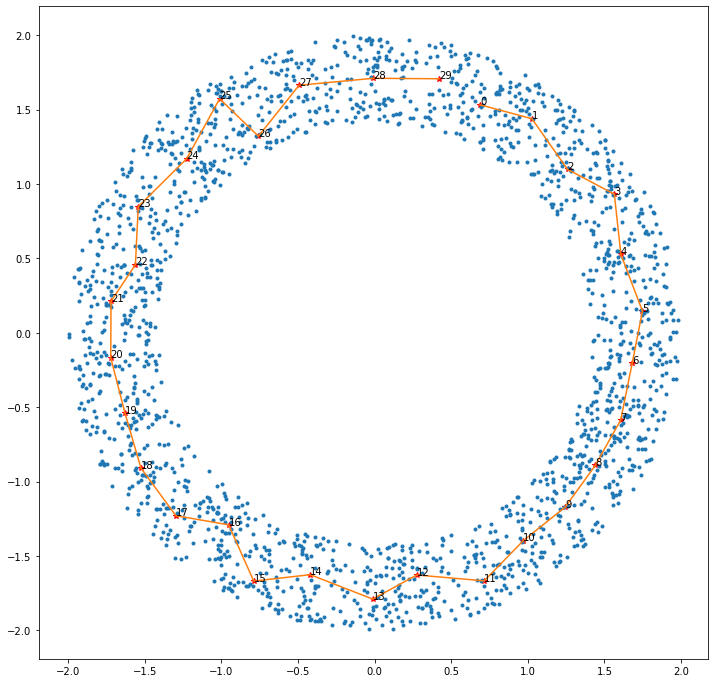

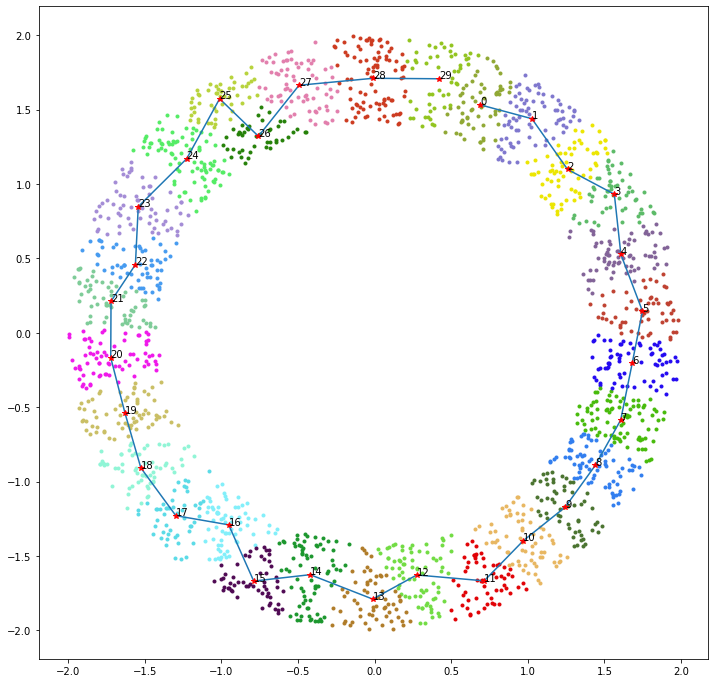

In [16]:
SOM_doughnut(doughnut)

[0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286 1.        ]


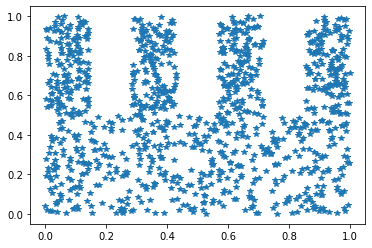

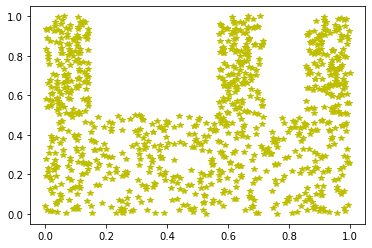

In [17]:
fin=np.arange(7)
fin=np.true_divide(fin, 7)
fin=np.append(fin,1)
print(fin)



df_4_finger=pd.DataFrame()
df_3_finger=pd.DataFrame()
random.seed(1)
#hand
i=0
while i<500:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY<=0.5:
        df_4_finger[i] = [randX, randY]
        df_3_finger[i] = [randX, randY] 
        i+=1


#pointer

while i<650:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY>=0.5:
        if fin[0]<randX<fin[1]:
            df_4_finger[i] = [randX, randY]
            df_3_finger[i] = [randX, randY] 
            i+=1

#ring

while i<800:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY>=0.5:
        if fin[4]<randX<fin[5]:
            df_4_finger[i] = [randX, randY]
            df_3_finger[i] = [randX, randY] 
            i+=1
            
#pinky

while i<950:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY>=0.5:
        if fin[6]<randX<fin[7]:
            df_4_finger[i] = [randX, randY]
            df_3_finger[i] = [randX, randY] 
            i+=1

#middle

while i<1100:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY>=0.5:
        if fin[2]<randX<fin[3]:
            df_4_finger[i] = [randX, randY]
            i+=1

df_4_finger=df_4_finger.T
df_3_finger=df_3_finger.T


Xp4=[]
Yp4=[]
for index, row in df_4_finger.iterrows():
    Xp4.append(row[0])
    Yp4.append(row[1])

plt.plot(Xp4,Yp4,'*')
plt.show()

Xp3=[]
Yp3=[]
for index, row in df_3_finger.iterrows():
    Xp3.append(row[0])
    Yp3.append(row[1])

plt.plot(Xp3,Yp3,'*y')
plt.show()

In [18]:
def print_graphsq(nlist,slist):
    figure(figsize=(15, 8))
    X=[]
    Y=[]
    for i in range(len(nlist)):
        for j in range(len(nlist[i])):
            X.append(nlist[i][j][0])
            Y.append(nlist[i][j][1])
            plt.annotate((i, j),(nlist[i][j][0],nlist[i][j][1]))
            plt.plot(nlist[i][j][0],nlist[i][j][1],'*r')
    Xp=[]
    Yp=[]
    for n in slist:
        Xp.append(n[0])
        Yp.append(n[1])
    plt.plot(Xp,Yp,'.')
    plt.show()

In [19]:
def make_nlistsq(num):
    nueron_lst = []
    row = []
    xarr = np.arange(num-1)
    xarr = np.true_divide(xarr, num-1)
    xarr = np.append(xarr, 1)
    
    yarr = np.arange(num-1)
    yarr = np.true_divide(yarr, num-1)
    yarr = np.append(yarr, 1)
    for j in range(num):
        row = []
        for i in range(num):
            row.append([xarr[i] ,yarr[j]])
        nueron_lst.append(row)
    return nueron_lst

In [20]:
def SOMsq(data,n):
    nueron_lst=make_nlistsq(n)
    mid = 10
    num = 5
    alpha = 1
    maxdist=0.2
    
    ker = cv2.getGaussianKernel(mid * 2 + 1,-1)
    ker = ker.dot(ker.T)
    
    sampled_points = []
    for i in range(75):
#         print("start of iteration ",i )
#         print_graphsq(nueron_lst, sampled_points)
        if i > 0 and i % 11 == 0:
            alpha-=0.1
            num-=1
#             maxdist-=0.05

        sampled_points = []
        data = data.sample(frac=1)
        for index, row in data.iterrows():
            sampled_points.append(np.array([row[0], row[1]]))
            small_dist = np.inf

            # find closest nueron
            for n in range(len(nueron_lst)):
                for r in range(len(nueron_lst[n])):
                    dist = np.sqrt((row[0] - nueron_lst[n][r][0]) ** 2 + (row[1] - nueron_lst[n][r][1]) ** 2)
                    if dist < small_dist:
                        small_dist = dist
                        spotrow=n
                        spotcol=r

            for j in range(spotrow - num, spotrow + num + 1):
                for k in range(spotcol - num, spotcol + num + 1):
                    if 0 <= j < len(nueron_lst) and 0 <= k < len(nueron_lst[j]):
#                         if j!=spotrow and k!=spotcol:
#                             if np.sqrt((nueron_lst[j][k][0]-row[0])**2+(nueron_lst[j][k][1]-row[1])**2)<maxdist:
                        new = nueron_lst[j][k] + alpha * ker[mid-spotrow+j][mid-spotcol+k] * (sampled_points[-1] - nueron_lst[j][k])
                        nueron_lst[j][k] = new
#                         else:
#                             new = nueron_lst[j][k] + alpha * ker[mid-spotrow+j][mid-spotcol+k] * (sampled_points[-1] - nueron_lst[j][k])
#                             nueron_lst[j][k] = new 
#         if i%10==0:
        print("end of iteration ",i )
        print_graphsq(nueron_lst,sampled_points)

    print("iteration ",i )
    print_graphsq(nueron_lst,sampled_points)
    

In [21]:
data = pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data[i] = [randX, randY]
data = data.T

In [22]:
# SOMsq(data_corner,10)

In [23]:
def SOM_hand(data,n,nueron_lst):
#     nueron_lst=make_nlistsq(n)
    mid = 10
    num = 5
    alpha = 1    
    ker = cv2.getGaussianKernel(mid * 2 + 1,-1)
    ker = ker.dot(ker.T)
    
    sampled_points = []
    for i in range(75):
        
        if i > 0 and i % 11 == 0:
            alpha-=0.1
            num-=1


        sampled_points = []
        data = data.sample(frac=1)
        for index, row in data.iterrows():
            sampled_points.append(np.array([row[0], row[1]]))
            small_dist = np.inf

            # find closest nueron
            for n in range(len(nueron_lst)):
                for r in range(len(nueron_lst[n])):
                    dist = np.sqrt((row[0] - nueron_lst[n][r][0]) ** 2 + (row[1] - nueron_lst[n][r][1]) ** 2)
                    if dist < small_dist:
                        small_dist = dist
                        spotrow=n
                        spotcol=r

            for j in range(spotrow - num, spotrow + num + 1):
                for k in range(spotcol - num, spotcol + num + 1):
                    if 0 <= j < len(nueron_lst) and 0 <= k < len(nueron_lst[j]):

                        new = nueron_lst[j][k] + alpha * ker[mid-spotrow+j][mid-spotcol+k] * (sampled_points[-1] - nueron_lst[j][k])
                        nueron_lst[j][k] = new
        if i%10==0:
            print("end of iteration ",i )
            print_graphsq(nueron_lst,sampled_points)

    print("iteration ",i )
    print_graphsq(nueron_lst,sampled_points)
    return nueron_lst

end of iteration  0


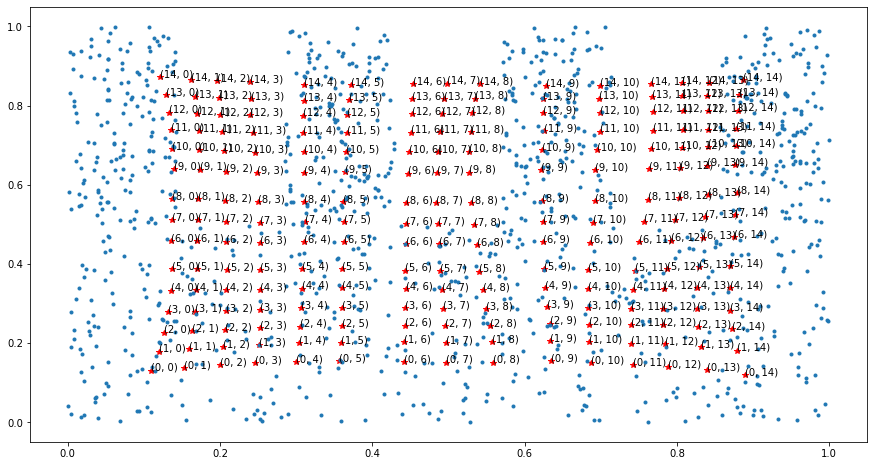

end of iteration  10


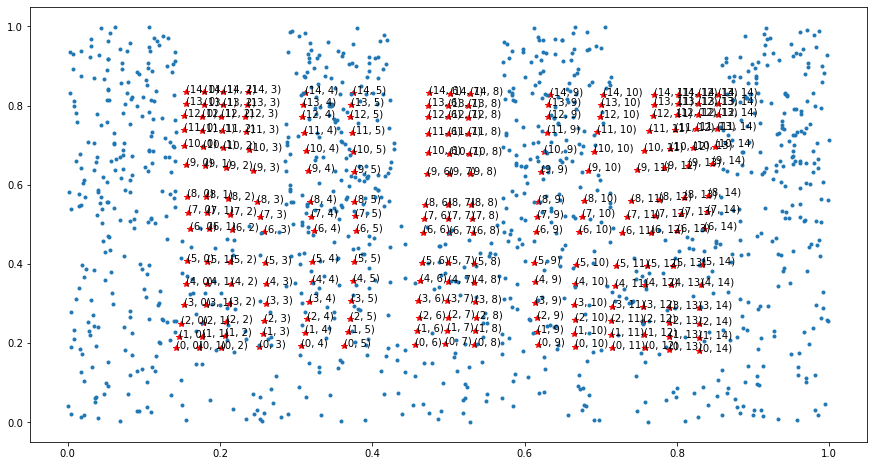

end of iteration  20


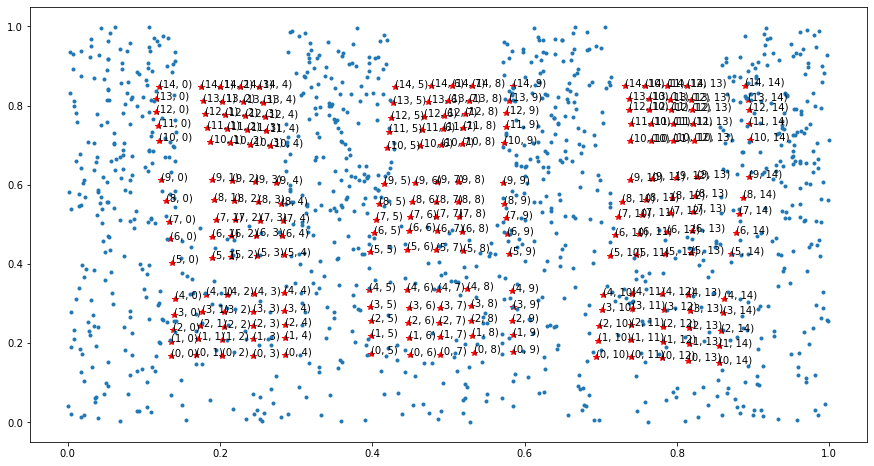

end of iteration  30


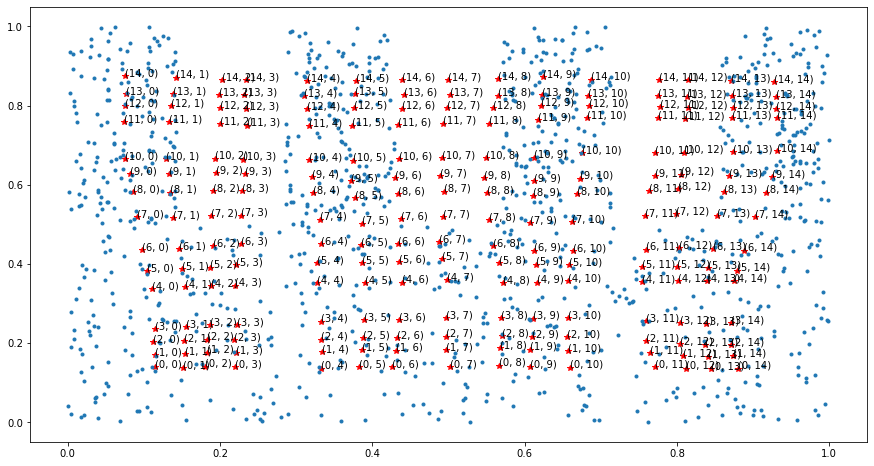

end of iteration  40


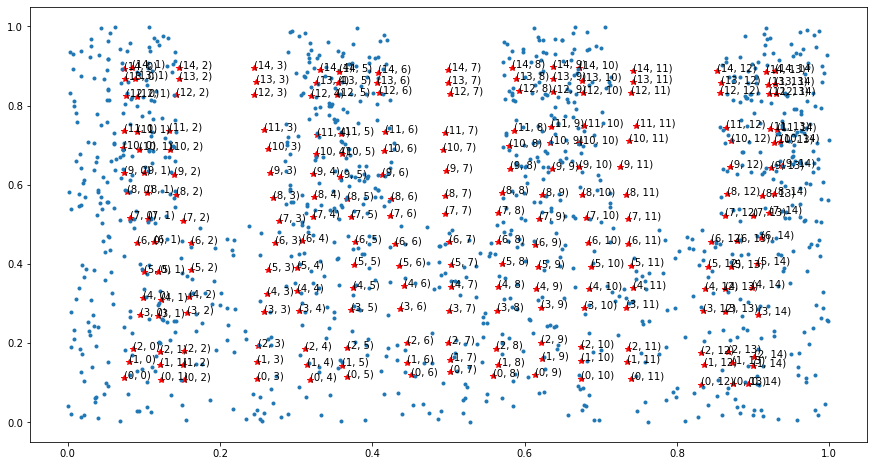

end of iteration  50


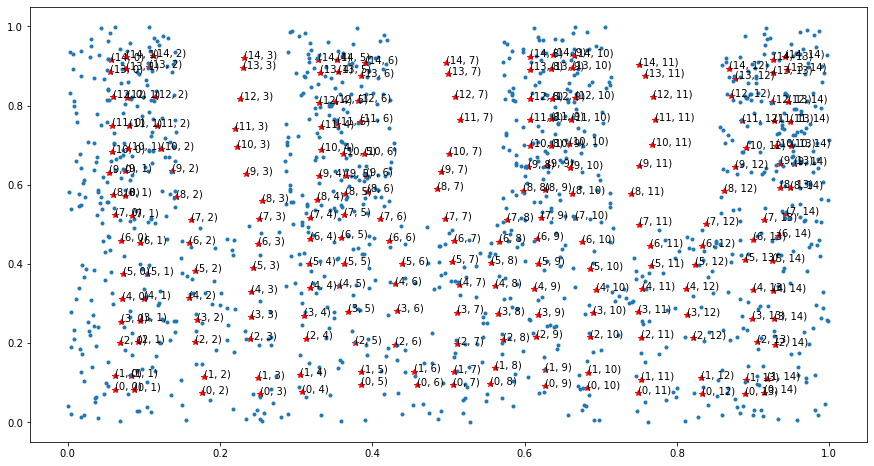

end of iteration  60


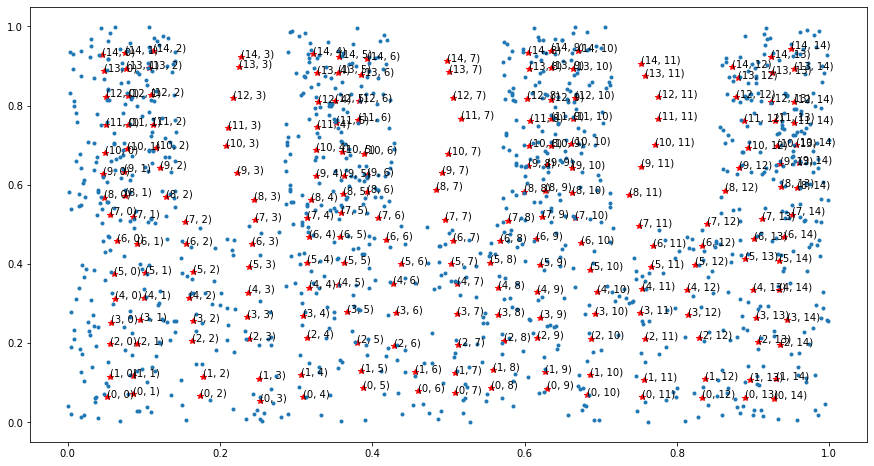

end of iteration  70


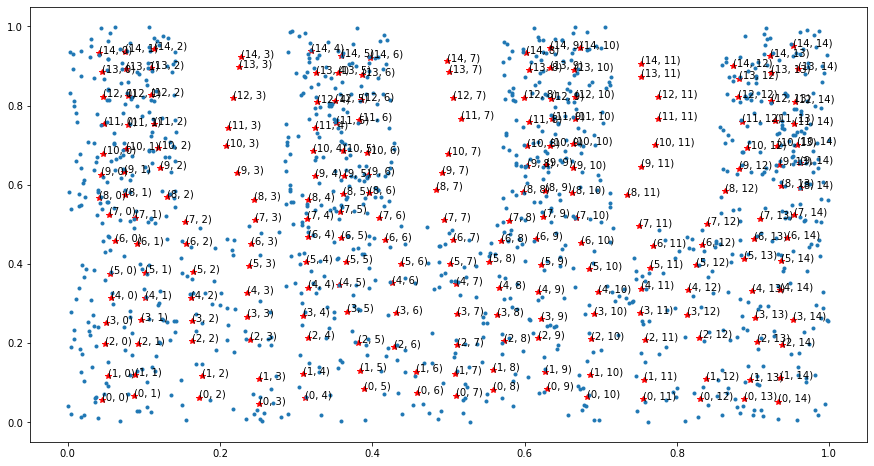

iteration  74


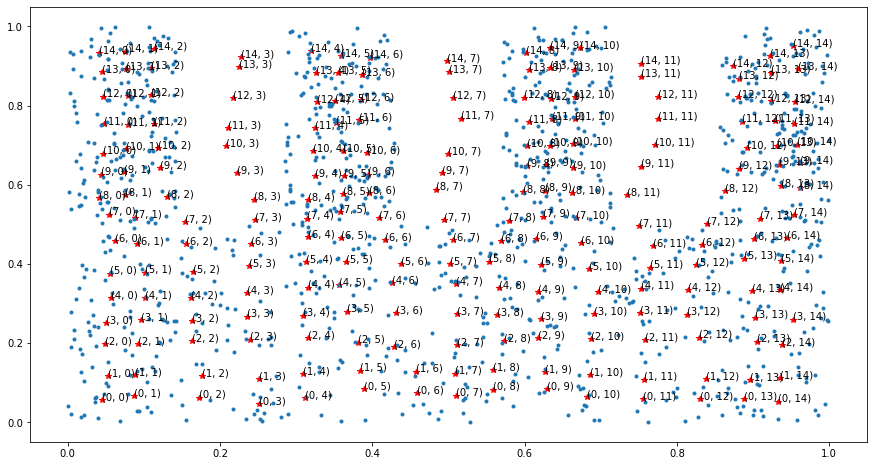

end of iteration  0


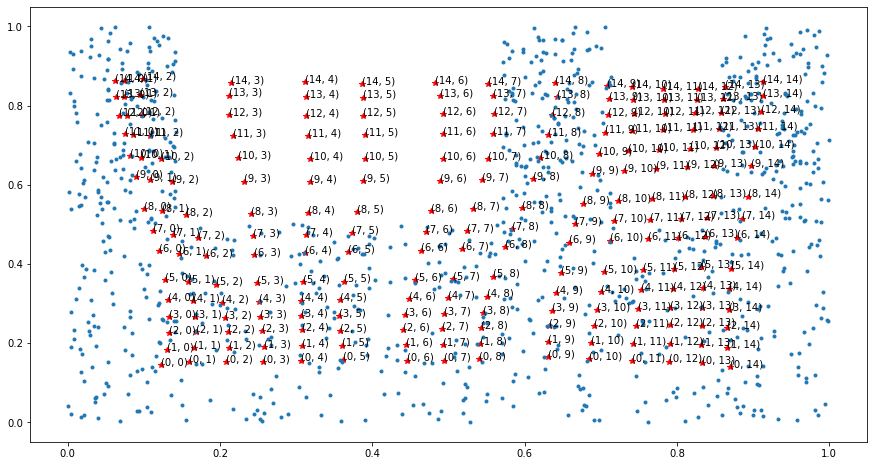

end of iteration  10


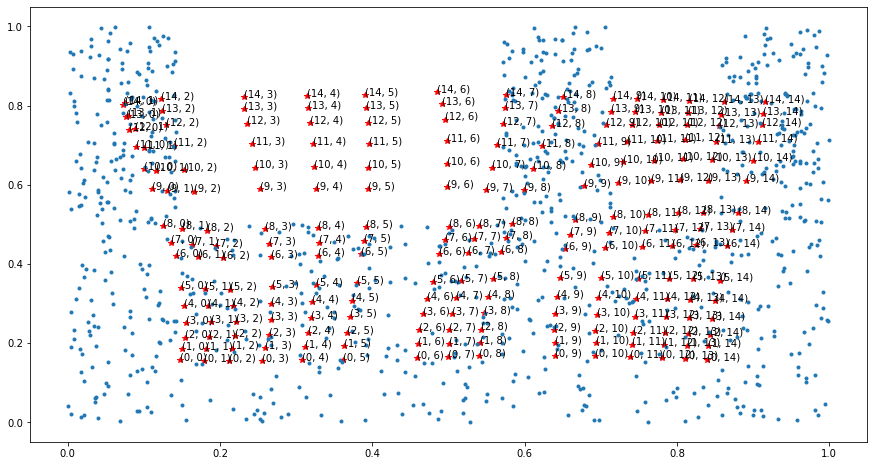

end of iteration  20


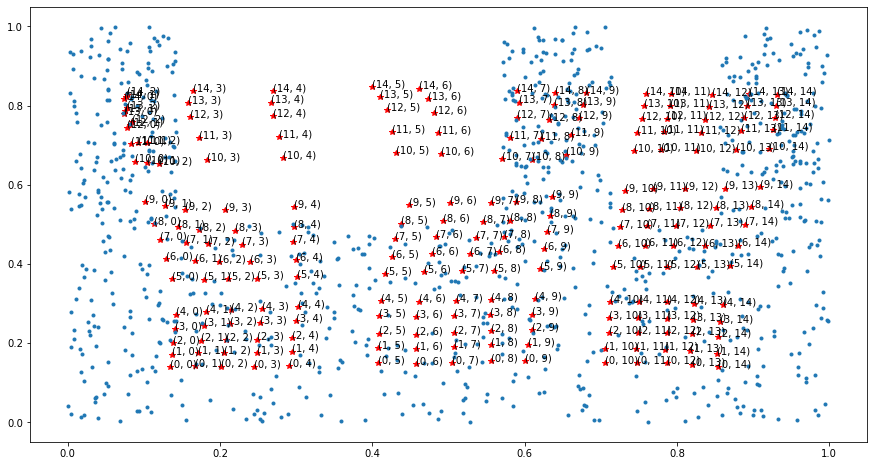

end of iteration  30


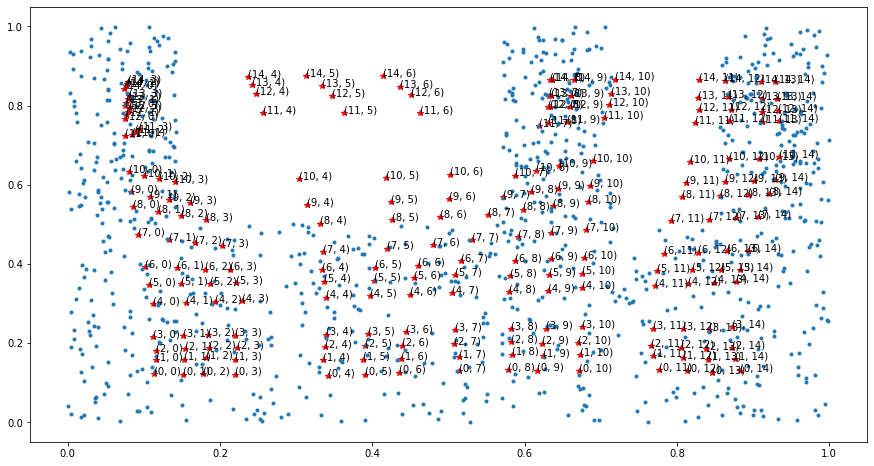

end of iteration  40


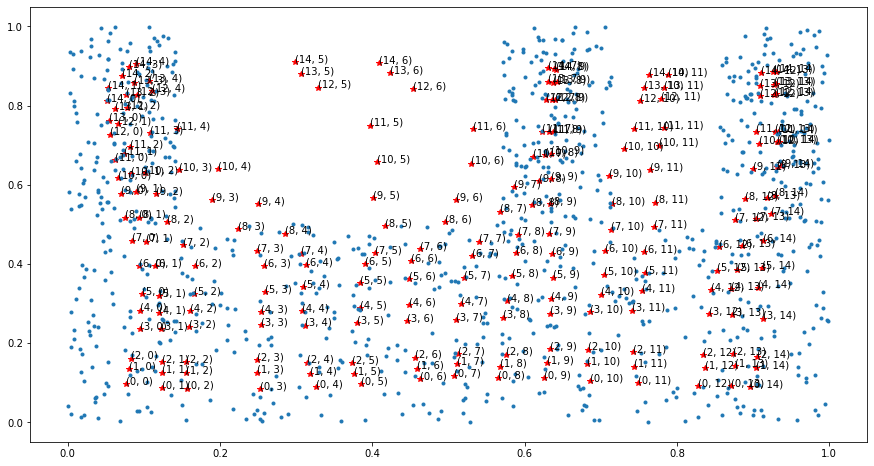

end of iteration  50


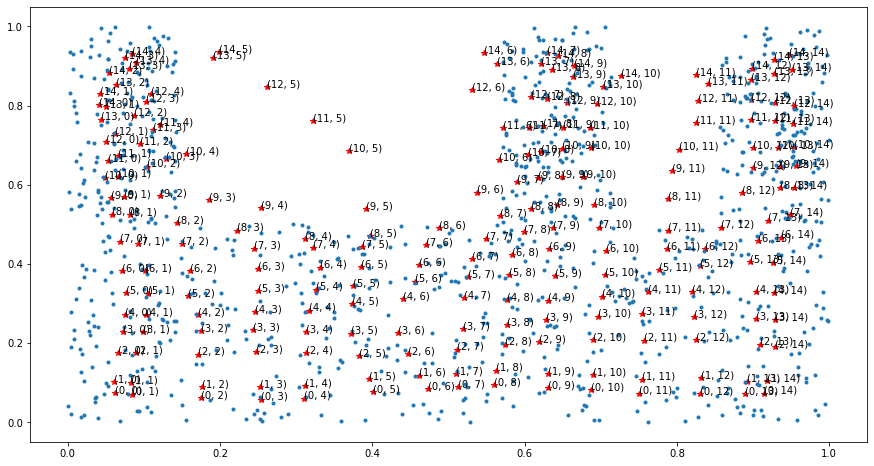

end of iteration  60


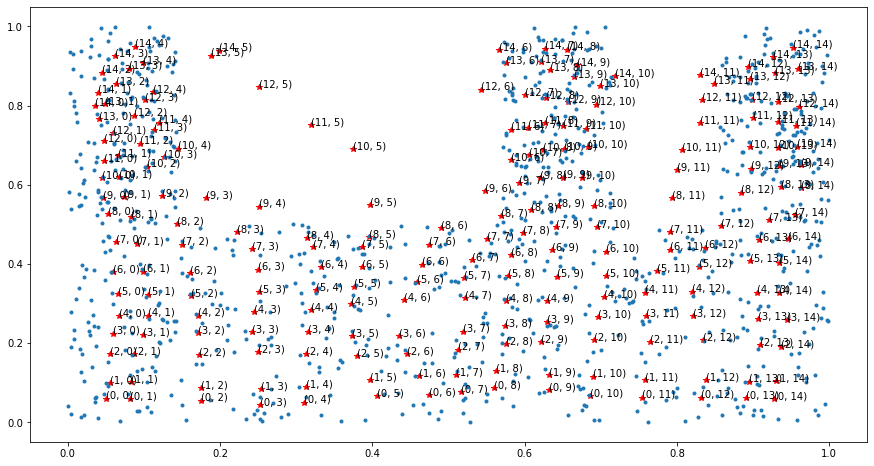

end of iteration  70


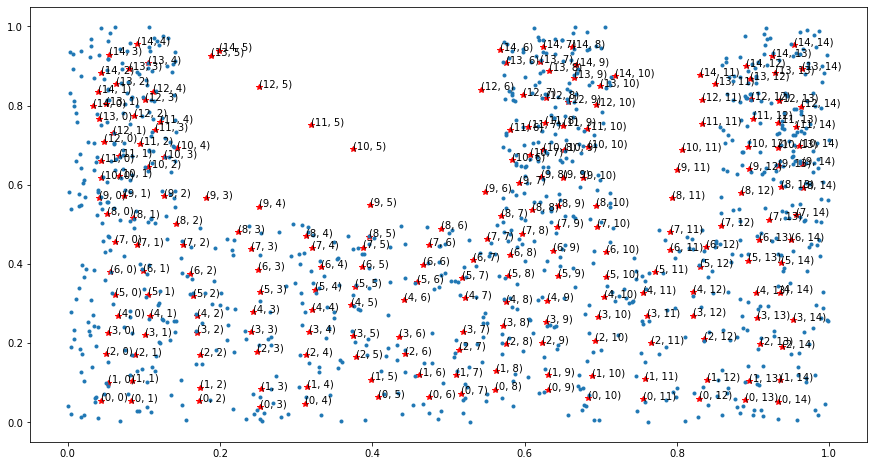

iteration  74


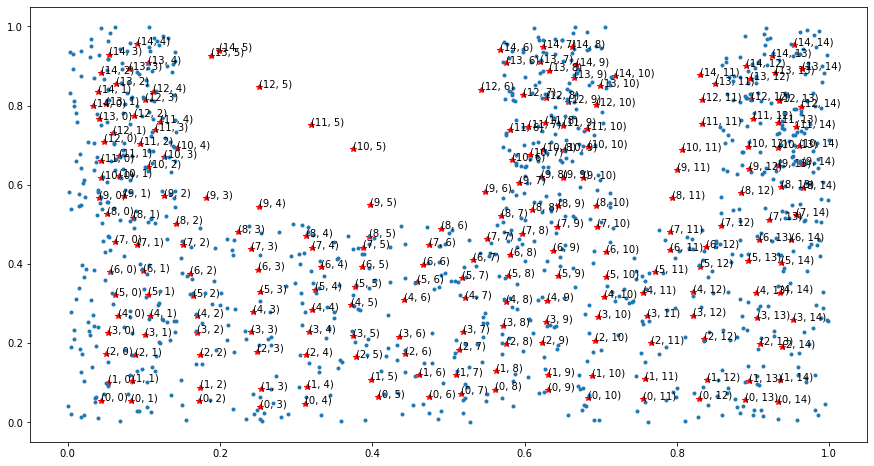

[[array([0.04388838, 0.05467594]),
  array([0.08318049, 0.05393521]),
  array([0.17217197, 0.05346592]),
  array([0.2524672 , 0.03793809]),
  array([0.31213023, 0.04719174]),
  array([0.40749122, 0.06284289]),
  array([0.47467171, 0.06285391]),
  array([0.51694658, 0.07266083]),
  array([0.56068868, 0.08276315]),
  array([0.63132312, 0.08087916]),
  array([0.68387825, 0.06107535]),
  array([0.7552033 , 0.05936628]),
  array([0.82938586, 0.05980024]),
  array([0.88913583, 0.05695692]),
  array([0.93285453, 0.05166482])],
 [array([0.05270185, 0.1006303 ]),
  array([0.08490261, 0.10470209]),
  array([0.17367423, 0.08766745]),
  array([0.25385604, 0.08385792]),
  array([0.31396943, 0.08918415]),
  array([0.39769633, 0.10788025]),
  array([0.46115777, 0.11856749]),
  array([0.51046288, 0.11963218]),
  array([0.56295139, 0.12911566]),
  array([0.63116609, 0.12010884]),
  array([0.68892754, 0.11676306]),
  array([0.75768055, 0.10921916]),
  array([0.83954804, 0.10666053]),
  array([0.89420679

In [24]:
nueron_lst=make_nlistsq(15)
nl=SOM_hand(df_4_finger,15,nueron_lst)
SOM_hand(df_3_finger,15,nl)

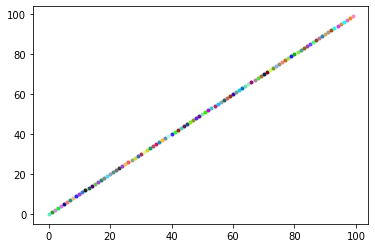

In [25]:
for i in range(100):
    r=random.uniform(0, 1)
    g=random.uniform(0, 1)
    b=random.uniform(0, 1)
    plt.plot(i,i,'.',color=(r,g,b))
   

In [26]:
#pip install kohanen-som

In [27]:
def color_cluster_line(data,nlist,size):
    figure(figsize=(12, 12))
    colors=[]
    for i in range(size):
        r=random.uniform(0, 1)
        g=random.uniform(0, 1)
        b=random.uniform(0, 1)
        colors.append((r,g,b))
    for index,row in data.iterrows():
        small_dist=np.inf
        for n in range(len(nlist)):
            dist=np.sqrt((row[0]-nueron_lst[n][0])**2+(row[1]-nueron_lst[n][1])**2)
            if dist<small_dist:
                small_dist=dist
                spot=n 
        plt.plot(row[0],row[1],'.',color=colors[spot])

In [28]:
def color_cluster_grid(data,nlist,size):
    figure(figsize=(12, 12))
    colors=[]
    for i in range(size):
        rows=[]
        for j in range(size):
            r=random.uniform(0, 1)
            g=random.uniform(0, 1)
            b=random.uniform(0, 1)
            rows.append((r,g,b))
        colors.append(rows)
    for index,row in data.iterrows():
        small_dist=np.inf
        for j in range(size):
            for k in range(size) :            
                dist=np.sqrt((row[0]-nlist[j][k][0])**2+(row[1]-nlist[j][k][1])**2)
                if dist<small_dist:
                    small_dist=dist
                    spotrow=j
                    spotcol=k
        plt.plot(row[0],row[1],'.',color=colors[spotrow][spotcol])

In [29]:
def draw_lines_grid(nlist,size):
    for i in range (size):
        Xrow=[]
        Yrow=[]
        Xcol=[]
        Ycol=[]
        for j in range (size):
            Xrow.append(nlist[i][j][0])
            Yrow.append(nlist[i][j][1])
            Xcol.append(nlist[j][i][0])
            Ycol.append(nlist[j][i][1])
        plt.plot(Xrow,Yrow)
        Plt.plot(Xcol,Ycol)
    plt.show()
    